In [1]:
import ISRAnalysis as an

Welcome to JupyROOT 6.14/04


In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import sys

# Unfolding for detector (up to dressed lepton level) 

In [3]:
binDef = "_FineCoarse"
channel = "muon"
year = "2016"
doSys = False

# Redirect STDOUT and STDERR
sys.stderr = open("stderr_"+channel+"_"+year+".txt", "w")
sys.stdout = open("stdout_"+channel+"_"+year+".txt", "w")

detUnfold_muon_2016 = an.ISRAnalysis(year, channel, False, "matrix", 
                                     "Detector_Dressed_DRp1_Fiducial", "Detector_Dressed_DRp1", binDef)

detUnfold_muon_2016_iter = an.ISRAnalysis(year, channel, False, "matrix", 
                                     "Detector_Dressed_DRp1_Fiducial", "Detector_Dressed_DRp1", binDef)

# Closure test
Unfold_muon_2016_closure_1 = an.ISRAnalysis(year, channel, False, "matrix", 
                                     "Detector_Dressed_DRp1_Fiducial", "Detector_Dressed_DRp1", binDef)
Unfold_muon_2016_closure_3 = an.ISRAnalysis(year, channel, False, "matrix_DYMG", 
                                     "Detector_Dressed_DRp1_Fiducial", "Detector_Dressed_DRp1", binDef)

In [4]:
# Nominal
detUnfold_muon_2016.setInputHist(False, False, None, "Detector")
detUnfold_muon_2016.setUnfoldBkgs(False, "Detector")
detUnfold_muon_2016.subFake() # Subract DY fake (out of fiducial volume at gen level)

detUnfold_muon_2016_iter.setInputHist(False, False, None, "Detector")
detUnfold_muon_2016_iter.setUnfoldBkgs(False, "Detector")
detUnfold_muon_2016_iter.subFake() # Subract DY fake (out of fiducial volume at gen level)

systematics_iter = {"iterEM": ["iterEM", "Nominal"]}
for sysName, postfixs in systematics_iter.items():
    for postfix in postfixs:
        detUnfold_muon_2016_iter.setSystematics(sysName, postfix)
        detUnfold_muon_2016_iter.setInputHist(False, False, None, "Detector", True, sysName, postfix)
        detUnfold_muon_2016_iter.setUnfoldBkgs(True, "Detector", sysName, postfix) #Combine Bkgs and Fake?
        detUnfold_muon_2016_iter.subFake(True, sysName, postfix) 

In [5]:
# Closure test
Unfold_muon_2016_closure_1.setInputHist(True, False, None, "Detector")
Unfold_muon_2016_closure_1.subFake(False, "nominal", "", False, "detector_level_DY_Fake") # Subract DY fake (out of fiducial volume at gen level)

Unfold_muon_2016_closure_3.setInputHist(True, False, None, "Detector")
Unfold_muon_2016_closure_3.subFake(False, "nominal", "", False, "detector_level_DY_Fake") # Subract DY fake (out of fiducial volume at gen level)

Unfold_muon_2016_closure_3.setSystematics("Closure", "Nominal") # Since nominal DY MC(aMC@NLO) needed to draw the truth distribution 
Unfold_muon_2016_closure_3.setInputHist(False, False, None, "Detector", True, "Closure", "Nominal")
Unfold_muon_2016_closure_3.subFake(True, "Closure", "Nominal") # Subract DY fake (out of fiducial volume at gen level)


In [6]:
detUnfold_muon_2016.doUnfold() # nominal unfold
    
detUnfold_muon_2016_iter.doUnfold()
detUnfold_muon_2016_iter.doUnfold(True, False)
    
Unfold_muon_2016_closure_1.doUnfold()
Unfold_muon_2016_closure_3.doUnfold()
Unfold_muon_2016_closure_3.doUnfold(doSys,False)

In [7]:
detUnfold_muon_2016_iter.checkIterEMUnfold()

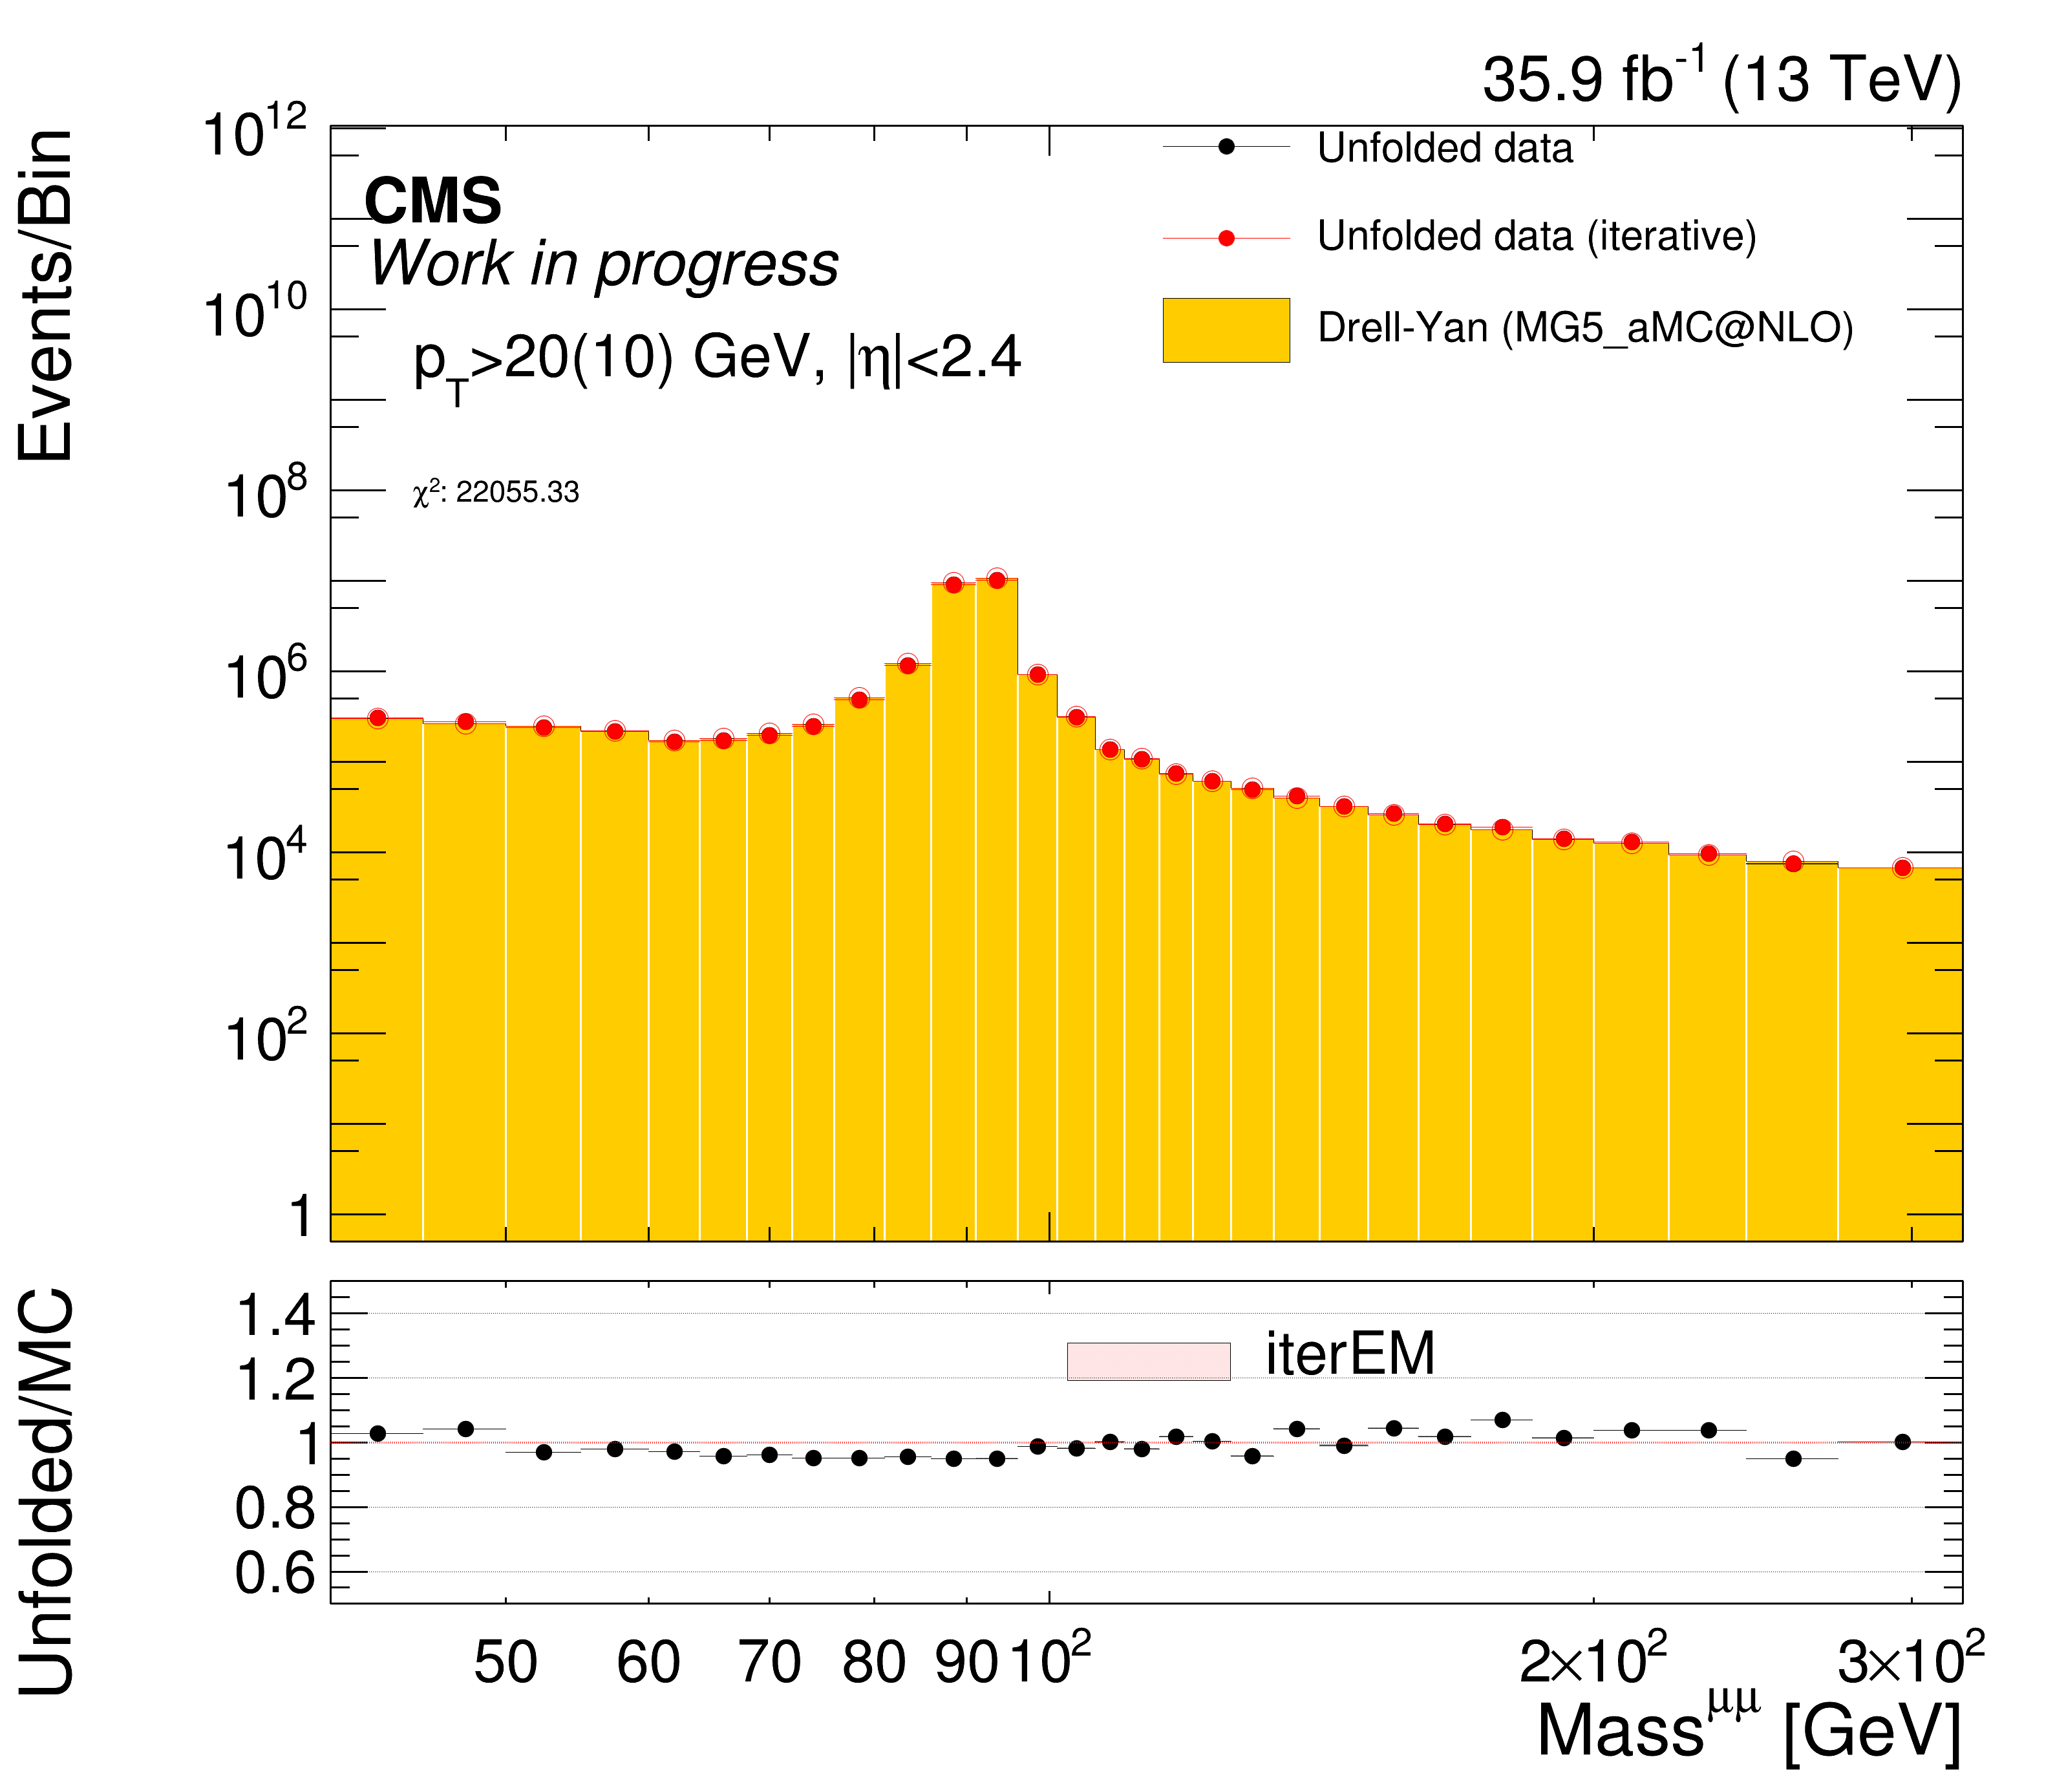

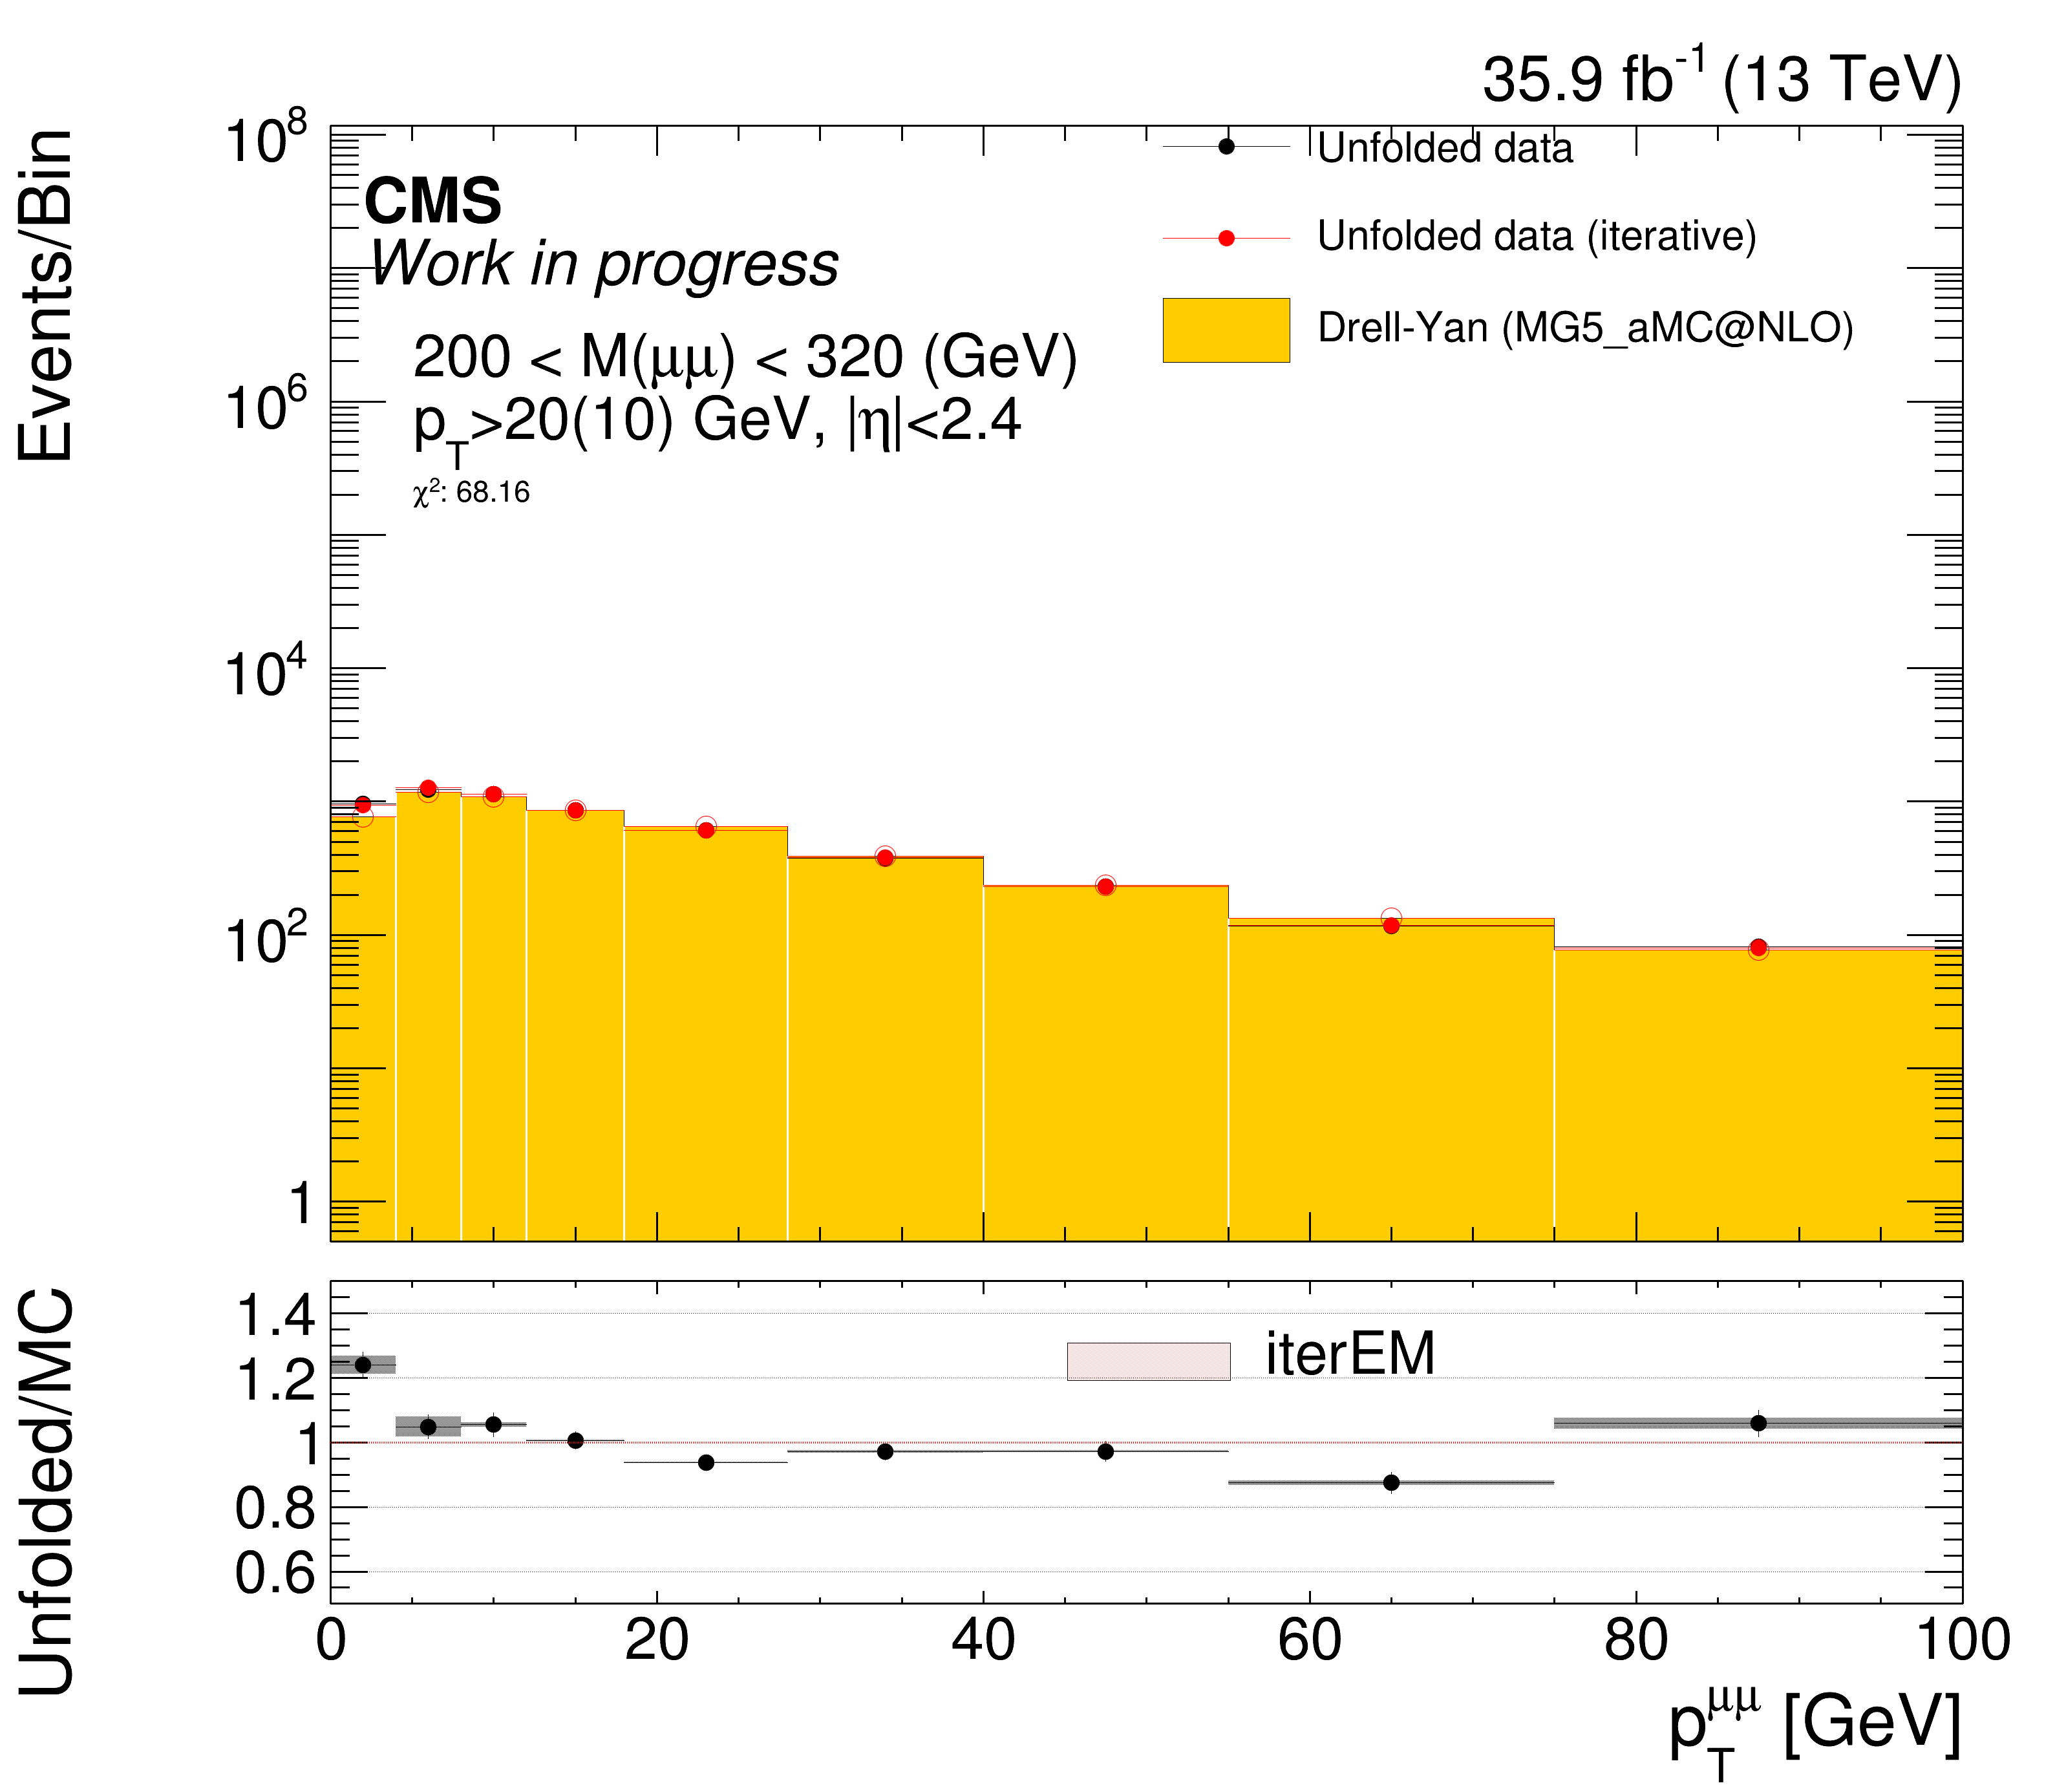

In [8]:
detUnfold_muon_2016_iter.drawUnfPlot("Mass", "mass[UO];pt[UOC0]", True, "iterEM", "DetUnf_")

for massBin in range(5):
    detUnfold_muon_2016_iter.drawUnfPlot("Pt", "pt[UO];mass[UOC"+str(massBin)+"]", True, "iterEM", "DetUnf_M"+str(massBin)+"_", massBin, True)

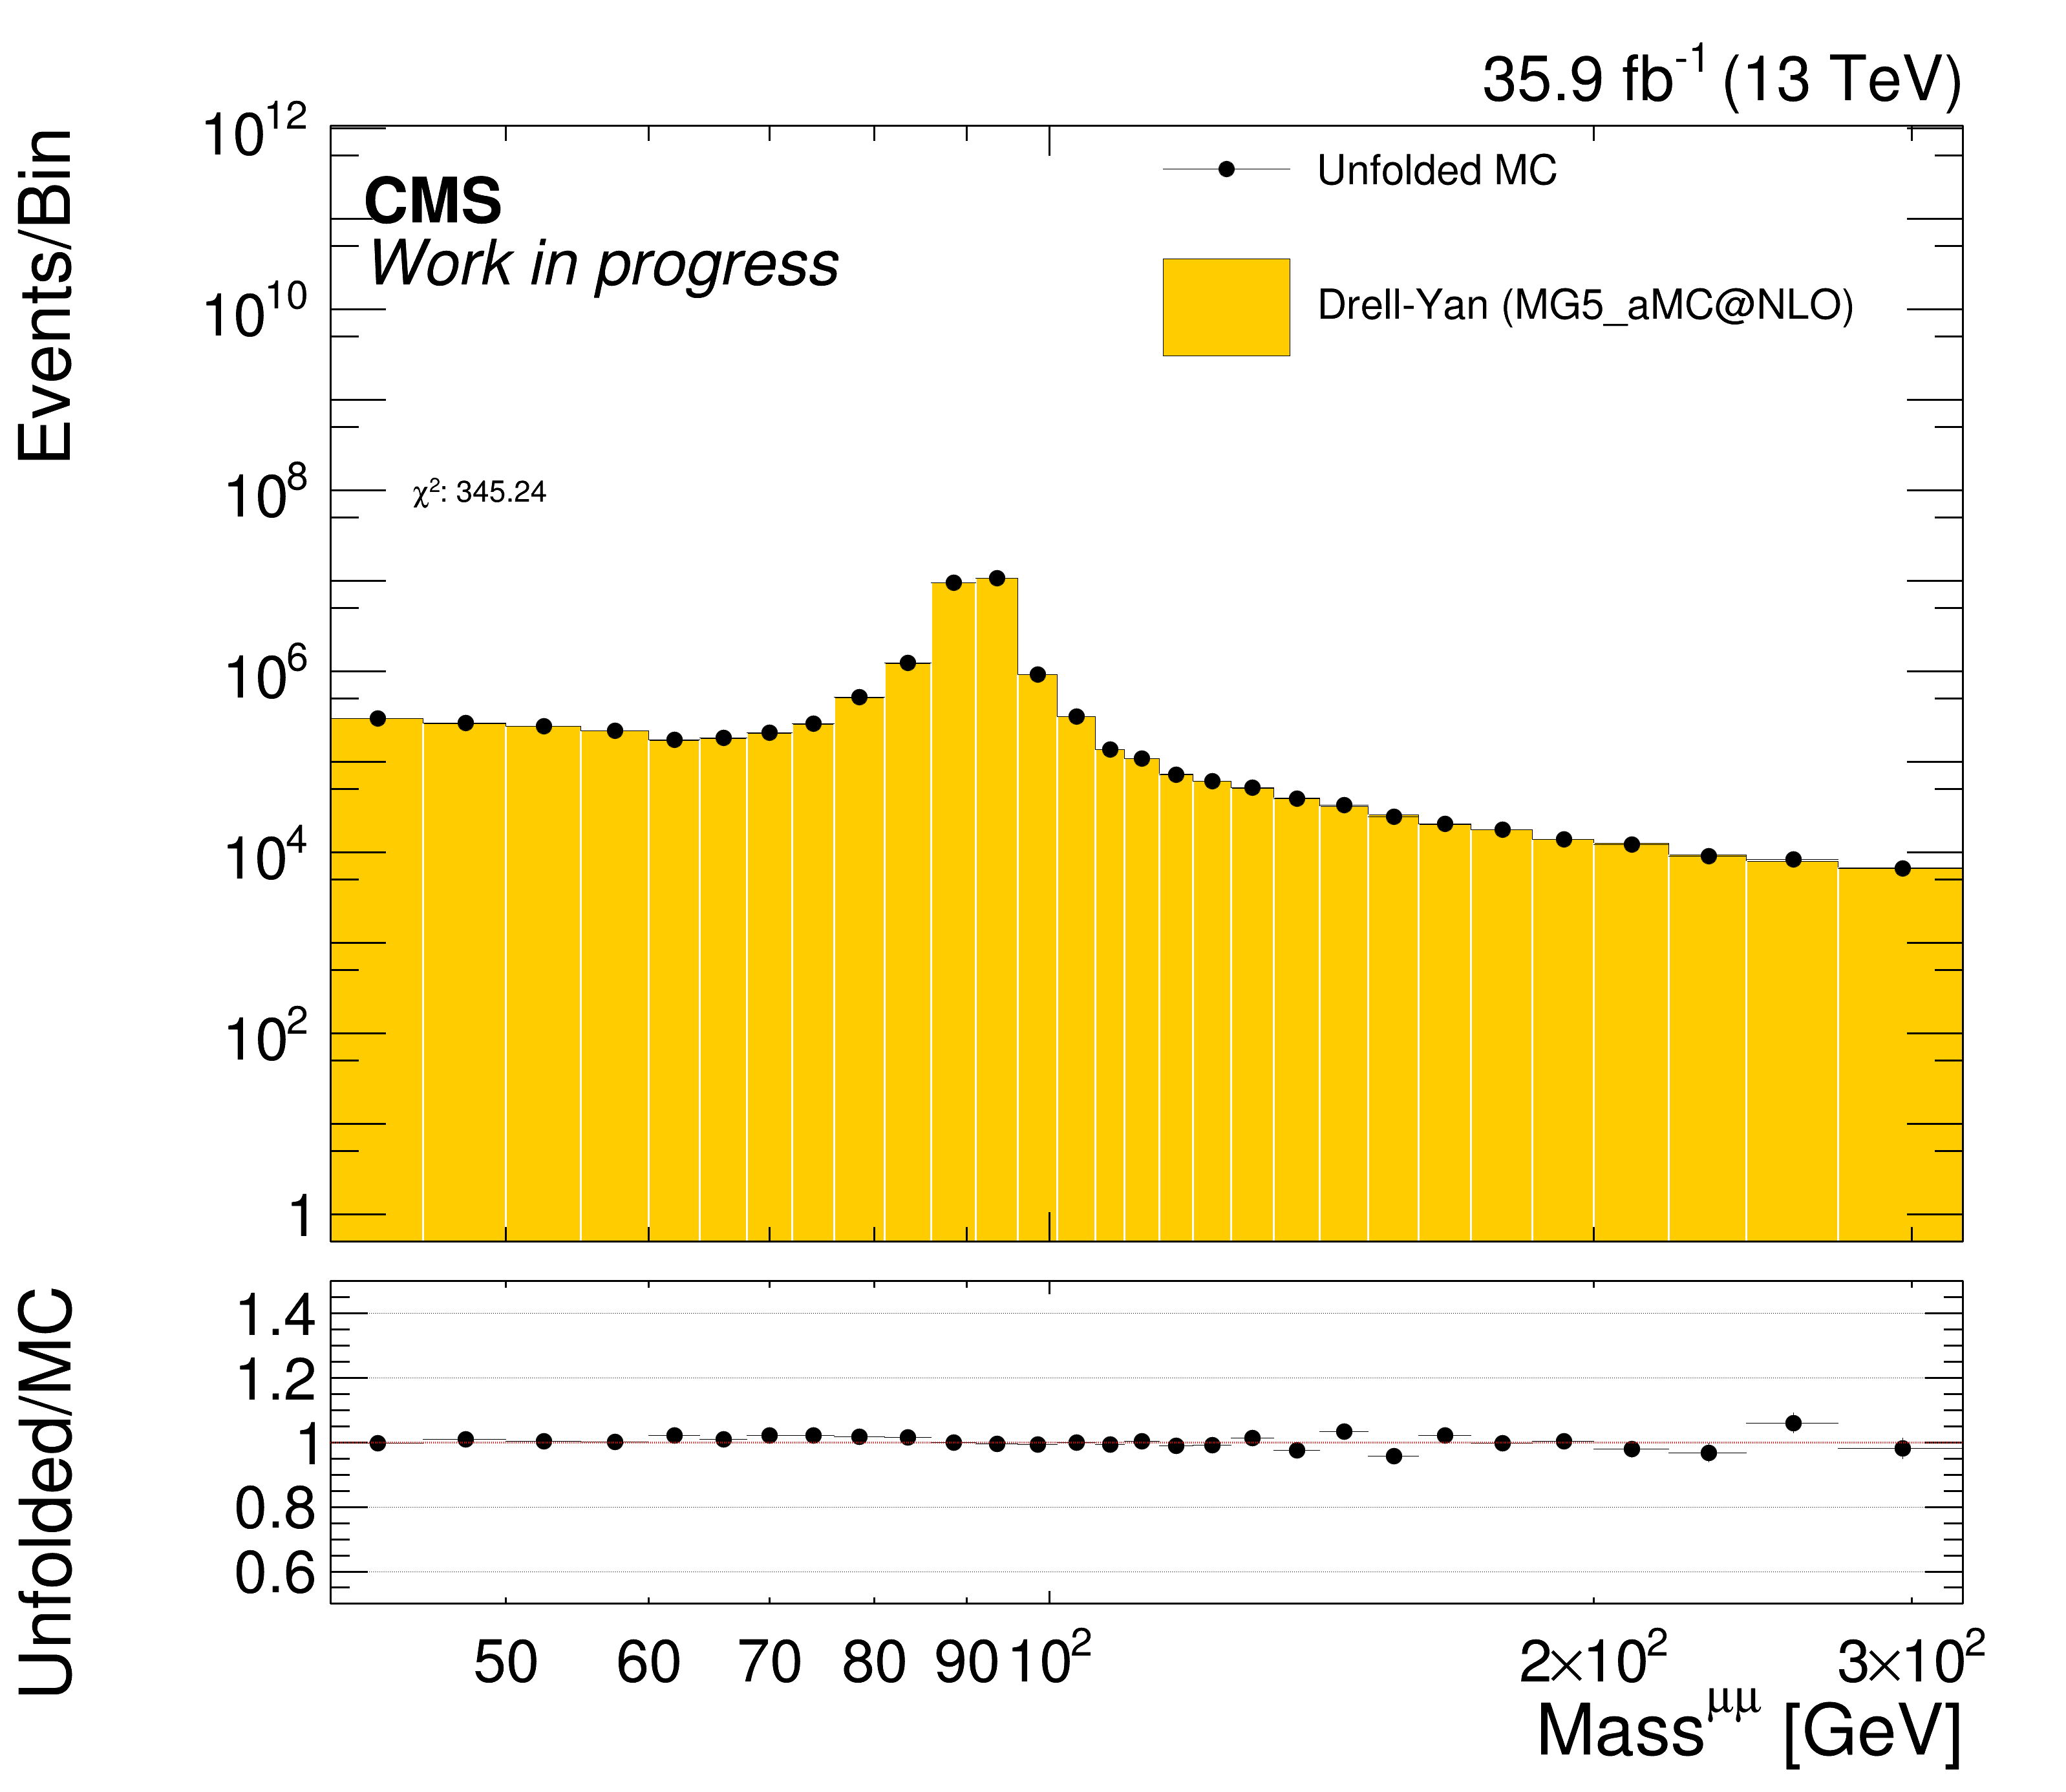

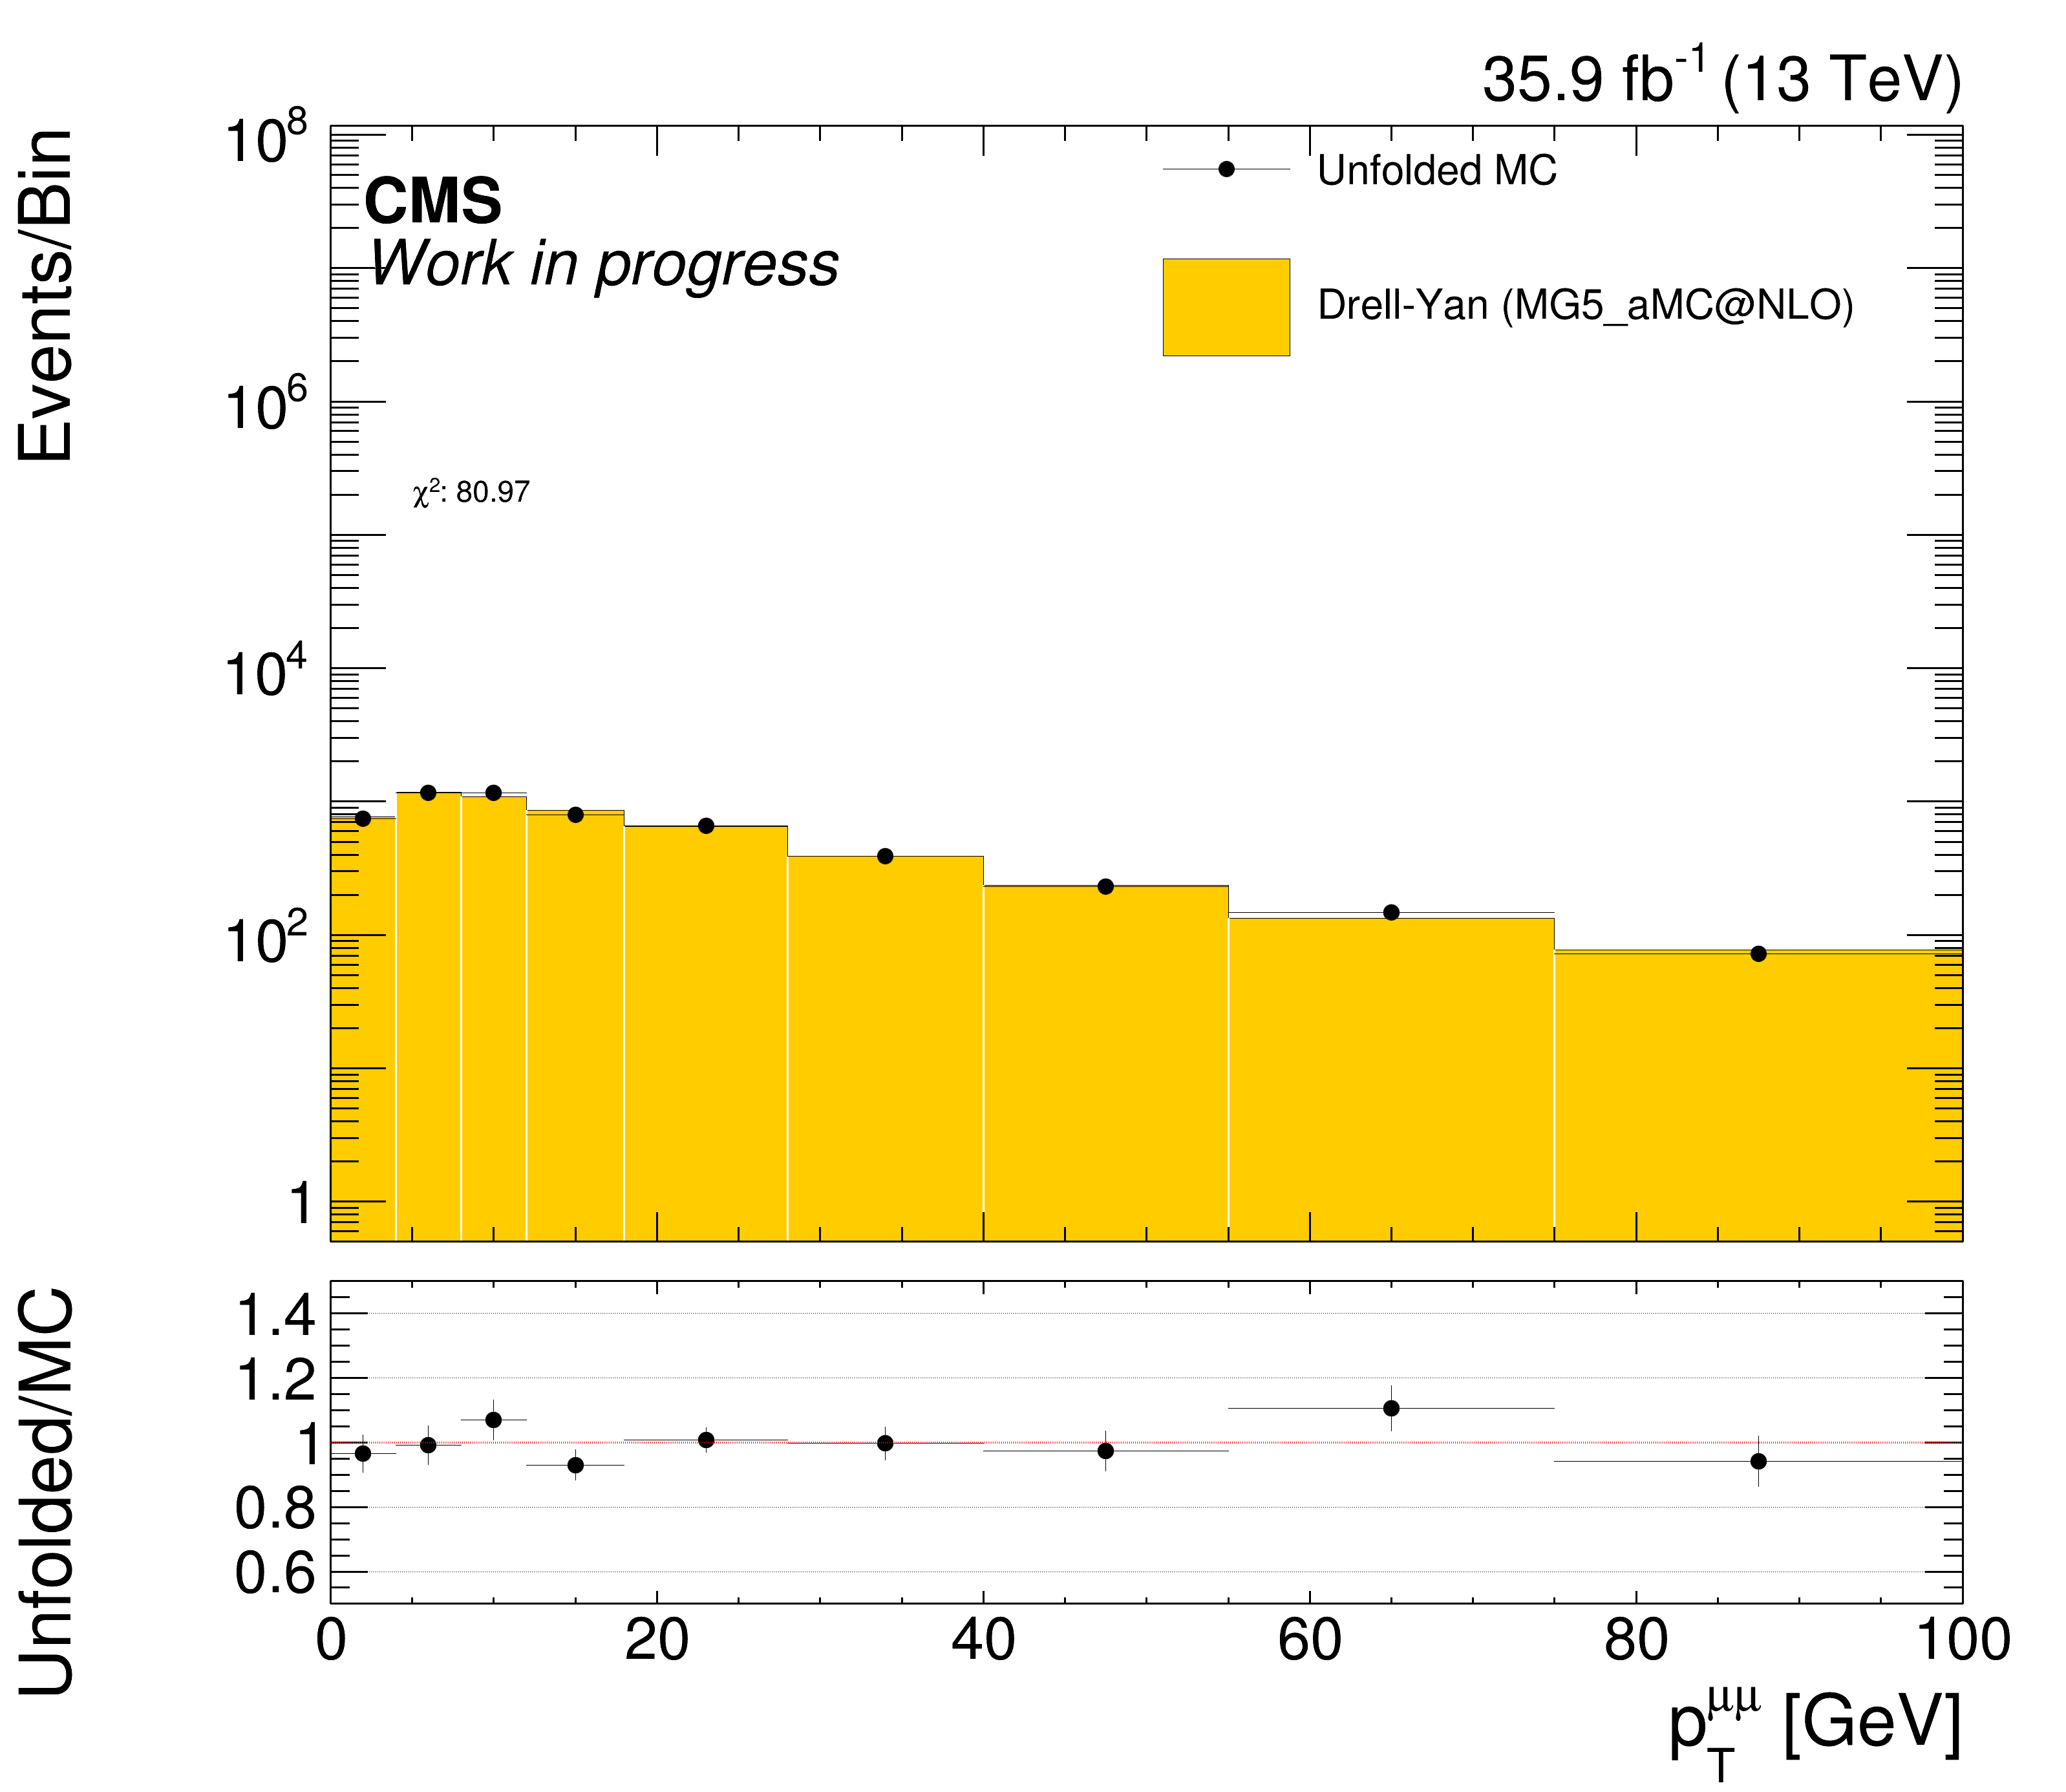

In [9]:
# Check unfolding closure
Unfold_muon_2016_closure_1.drawUnfPlot("Mass", "mass[UO];pt[UOC0]", True, "", "DetUnfClosure1_")
Unfold_muon_2016_closure_3.drawUnfPlot("Mass", "mass[UO];pt[UOC0]", True, "", "DetUnfClosure3_", 0, False, True)

for massBin in range(5):
    Unfold_muon_2016_closure_1.drawUnfPlot("Pt", "pt[UO];mass[UOC"+str(massBin)+"]", True, "", "DetUnfClosure1_M"+str(massBin)+"_", massBin, True)
    Unfold_muon_2016_closure_3.drawUnfPlot("Pt", "pt[UO];mass[UOC"+str(massBin)+"]", True, "", "DetUnfClosure3_M"+str(massBin)+"_", massBin, True, True)

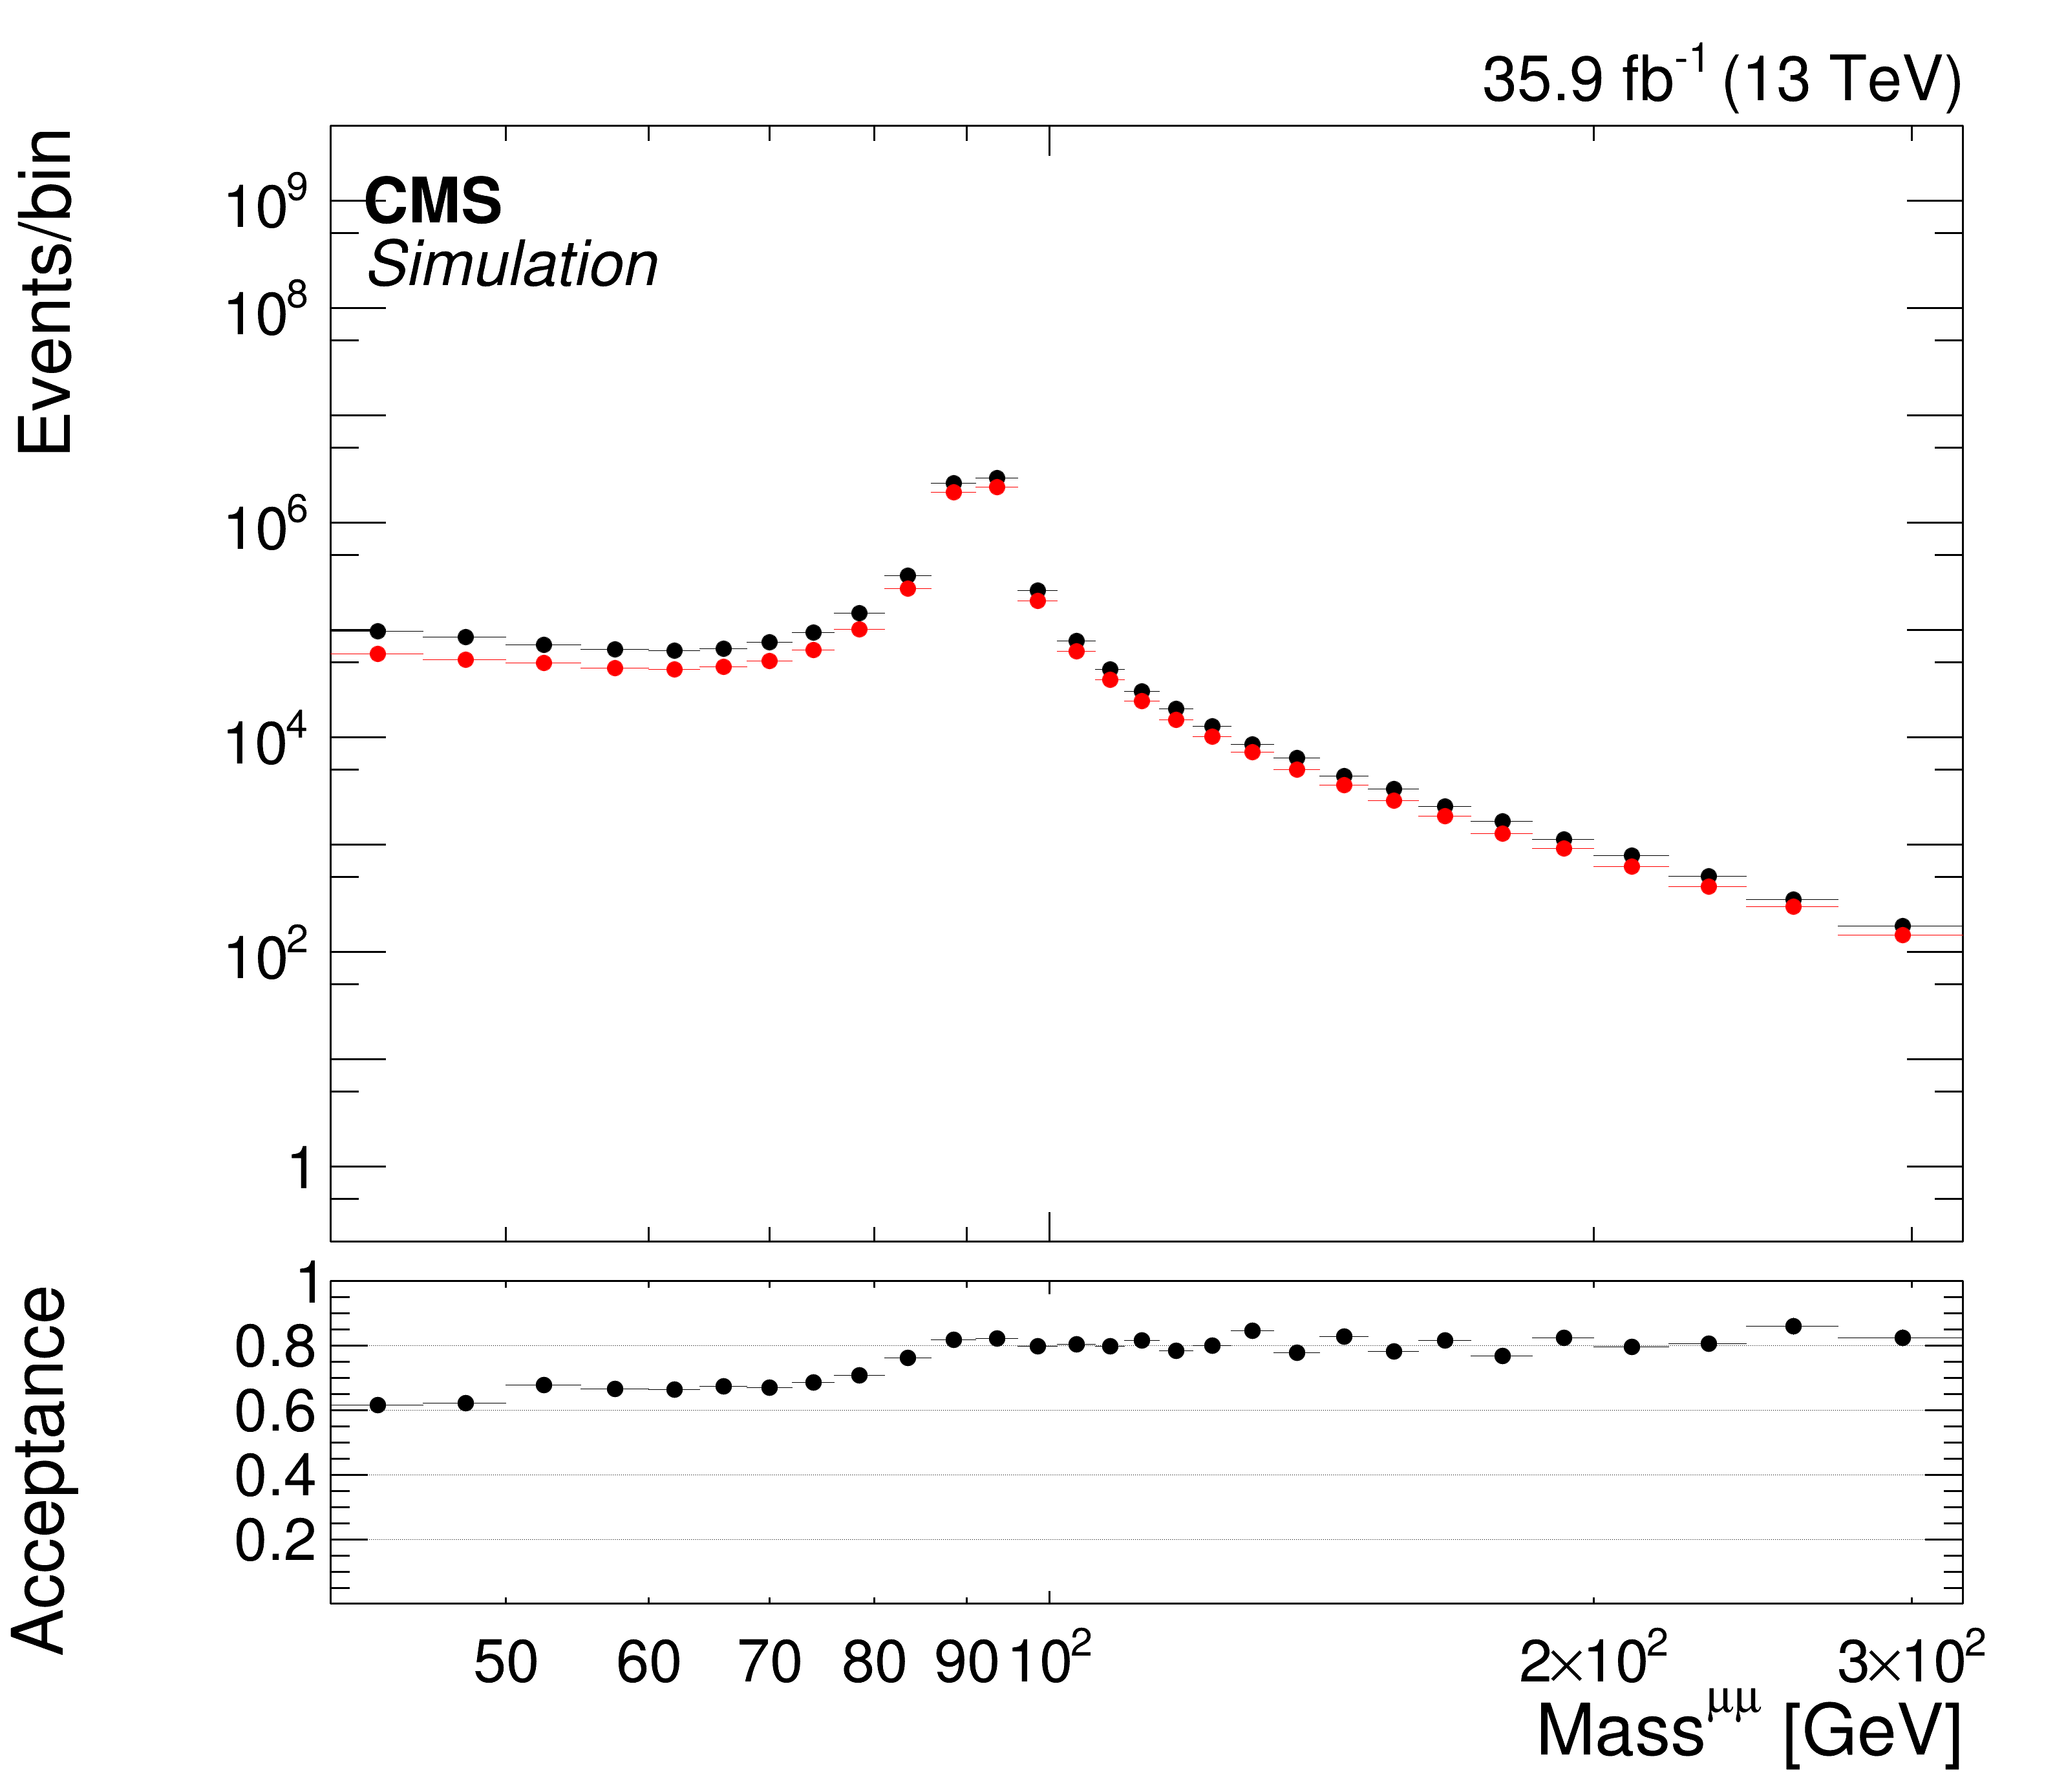

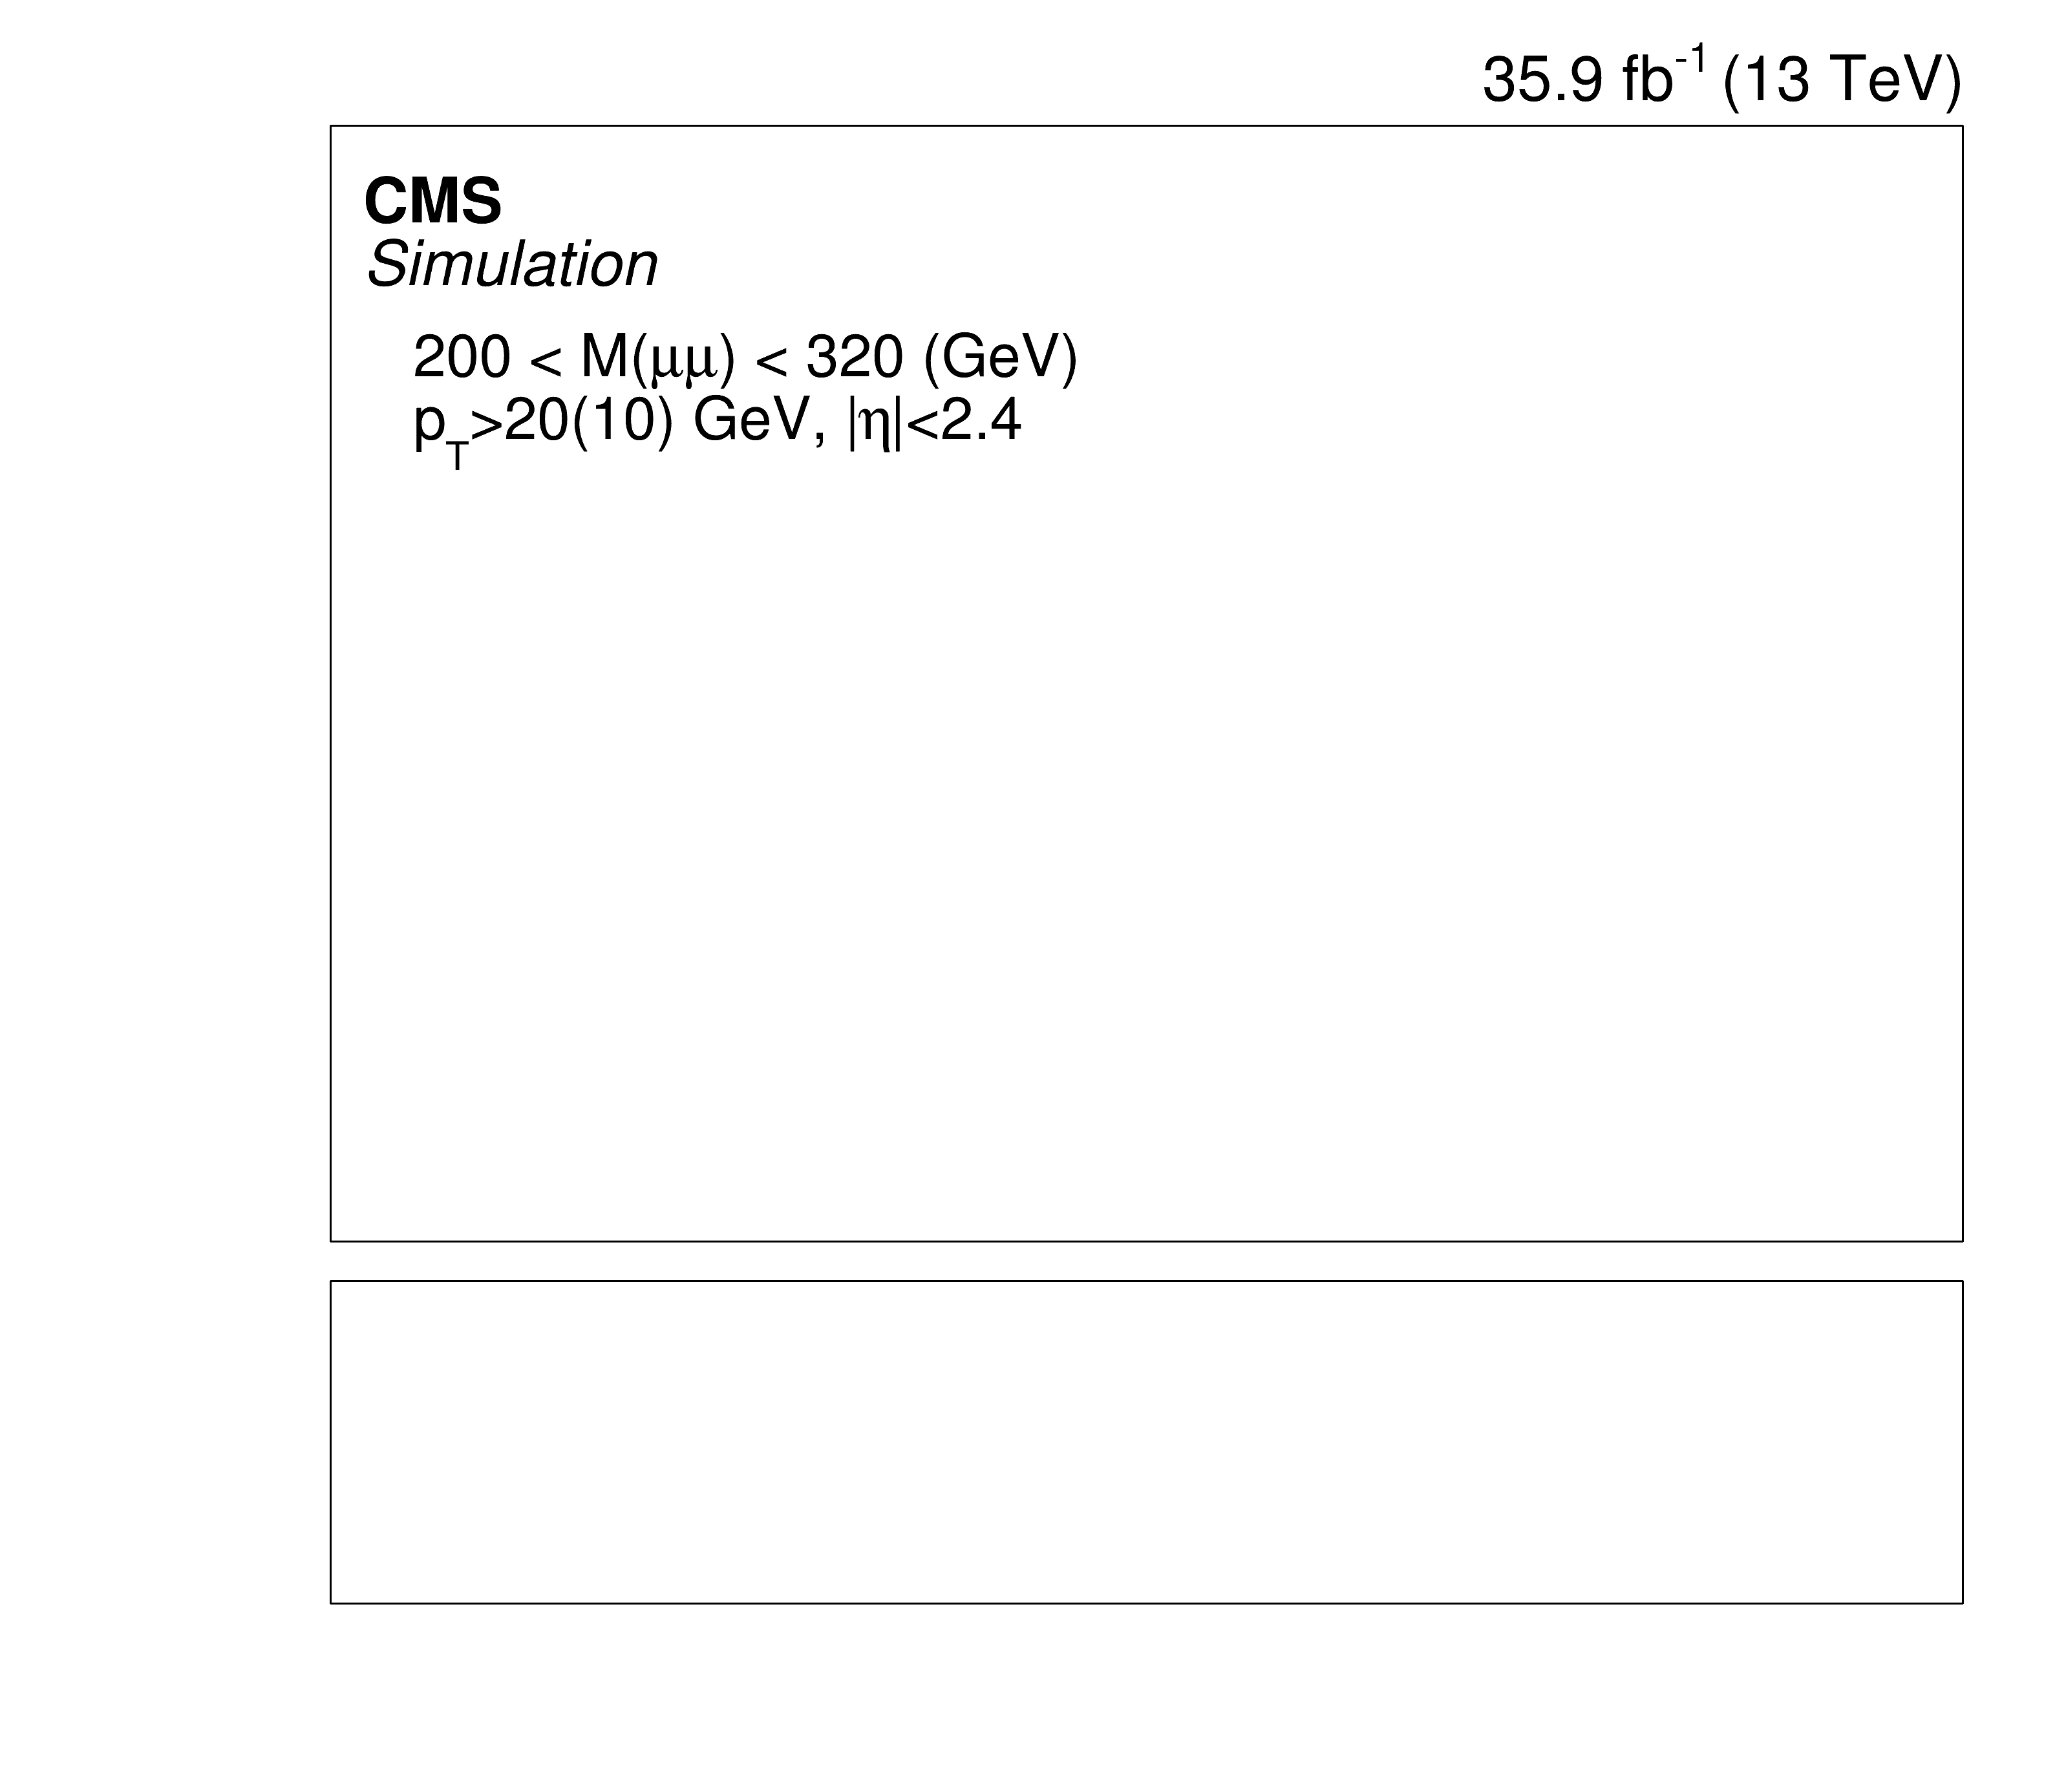

In [10]:
detUnfold_muon_2016.doAcceptance(doSys, False, "DetEfficienyCorr")

# Unfolding for QED FSR

In [11]:
binDef = "_CoarseCoarse"

phase_space = "Fiducial"

fsrUnfold_muon_2016 = an.ISRAnalysis(year, channel, True, "fsr_matrix", 
                                     "Dressed_DRp1_Dressed_DR4PI_"+phase_space, "Dressed_DRp1_Dressed_DR4PI", binDef)

fsrUnfold_muon_2016_iter = an.ISRAnalysis(year, channel, False, "fsr_matrix", 
                                     "Dressed_DRp1_Dressed_DR4PI_"+phase_space, "Dressed_DRp1_Dressed_DR4PI", binDef)

# Closure test
fsrUnfold_muon_2016_closure_1 = an.ISRAnalysis(year, channel, True, "fsr_matrix", 
                                     "Dressed_DRp1_Dressed_DR4PI_"+phase_space, "Dressed_DRp1_Dressed_DR4PI", binDef)
fsrUnfold_muon_2016_closure_2 = an.ISRAnalysis(year, channel, True, "fsr_matrix", 
                                     "Dressed_DRp1_Dressed_DR4PI_"+phase_space+"_oddEvent", "Dressed_DRp1_Dressed_DR4PI", binDef)
fsrUnfold_muon_2016_closure_3 = an.ISRAnalysis(year, channel, False, "fsr_matrix_DYMG", 
                                     "Dressed_DRp1_Dressed_DR4PI_"+phase_space, "Dressed_DRp1_Dressed_DR4PI", binDef)

In [12]:
fsrUnfold_muon_2016.setInputHist(False, True, detUnfold_muon_2016.getISRUnfold()) # Set nominal input using previous unfolding result
fsrUnfold_muon_2016.subFake(False, "Nominal", "", True, "dressed_level_DY_fake")
fsrUnfold_muon_2016.setFromPreviousUnfold(detUnfold_muon_2016.getISRUnfold()) # Set using previous unfolding result for systematics

In [13]:
fsrUnfold_muon_2016.doUnfold() # do nominal unfold

In [14]:
fsrUnfold_muon_2016_iter.setInputHist(False, True, detUnfold_muon_2016.getISRUnfold())
fsrUnfold_muon_2016_iter.subFake(False, "Nominal", "", True, "dressed_level_DY_fake") # Subract DY fake (out of fiducial volume at gen level)

fsr_systematics_iter = {"iterEM": ["iterEM", "Nominal"]}
for sysName, postfixs in fsr_systematics_iter.items():
    for postfix in postfixs:
        fsrUnfold_muon_2016_iter.setSystematics(sysName, postfix)
        fsrUnfold_muon_2016_iter.setInputHist(False, True, detUnfold_muon_2016.getISRUnfold(), "", True, sysName, postfix)
        fsrUnfold_muon_2016_iter.subFake(False, sysName, postfix) 

In [15]:
fsrUnfold_muon_2016_iter.doUnfold()
fsrUnfold_muon_2016_iter.doUnfold(True, False)

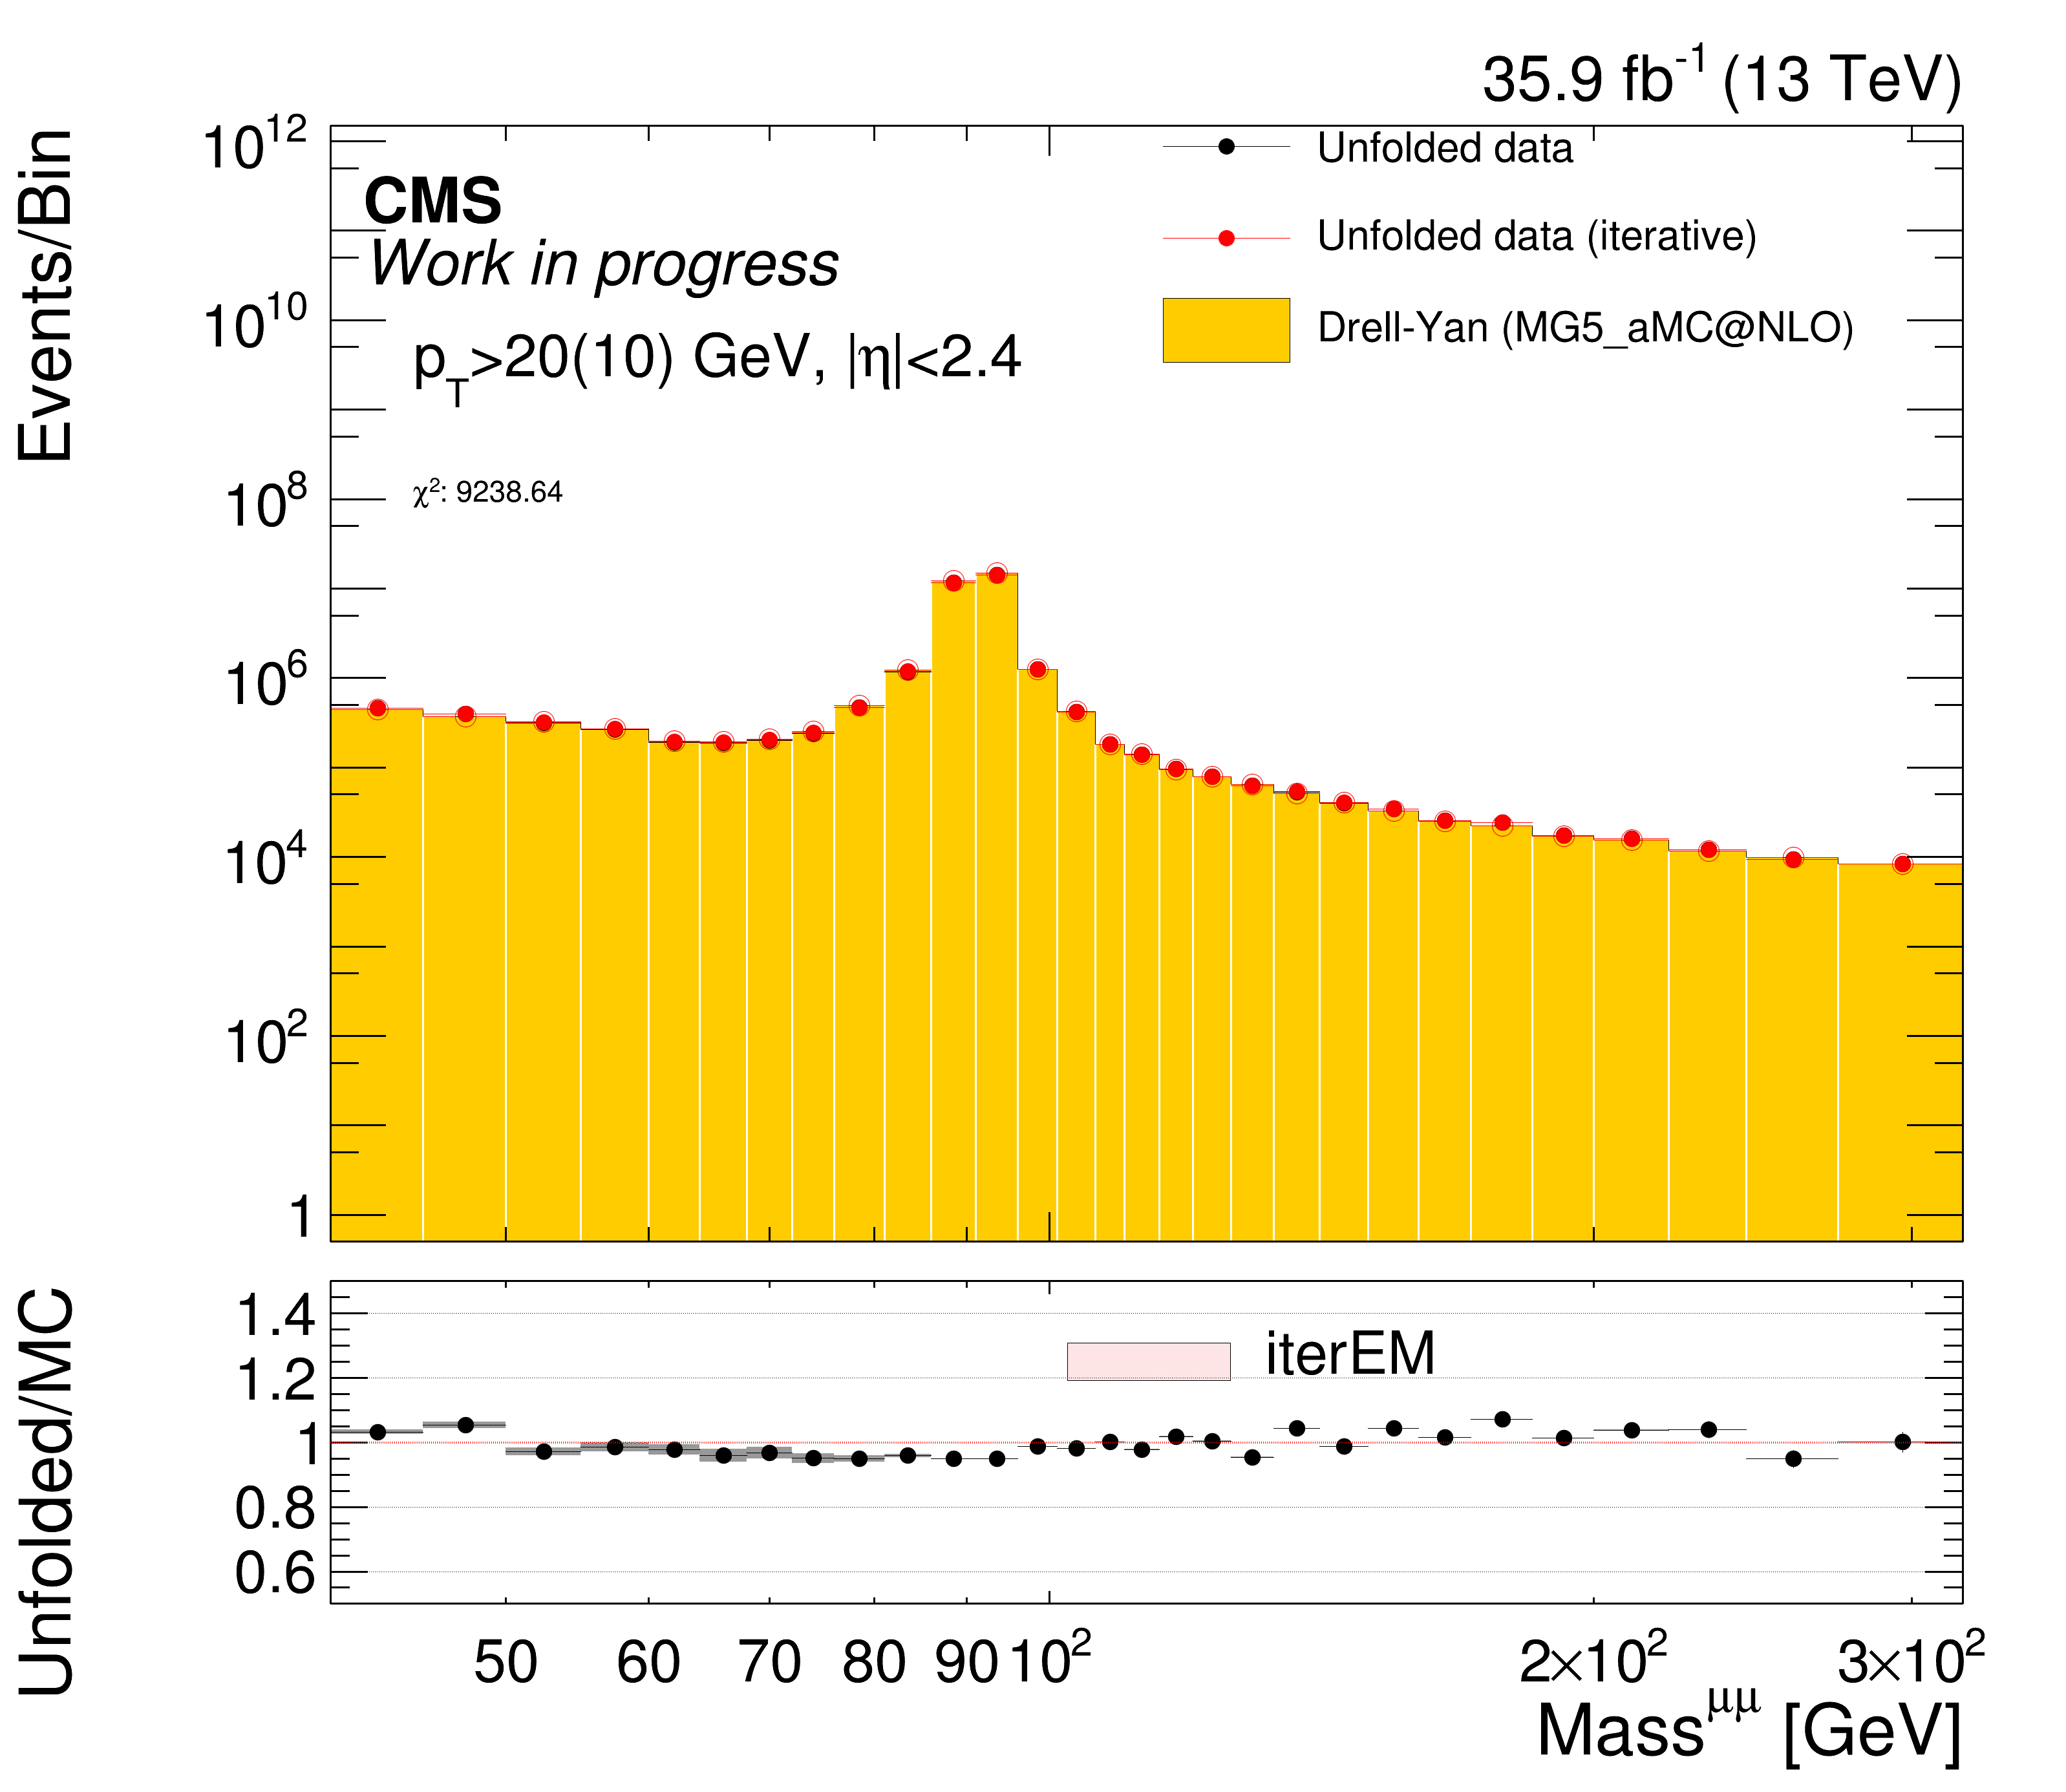

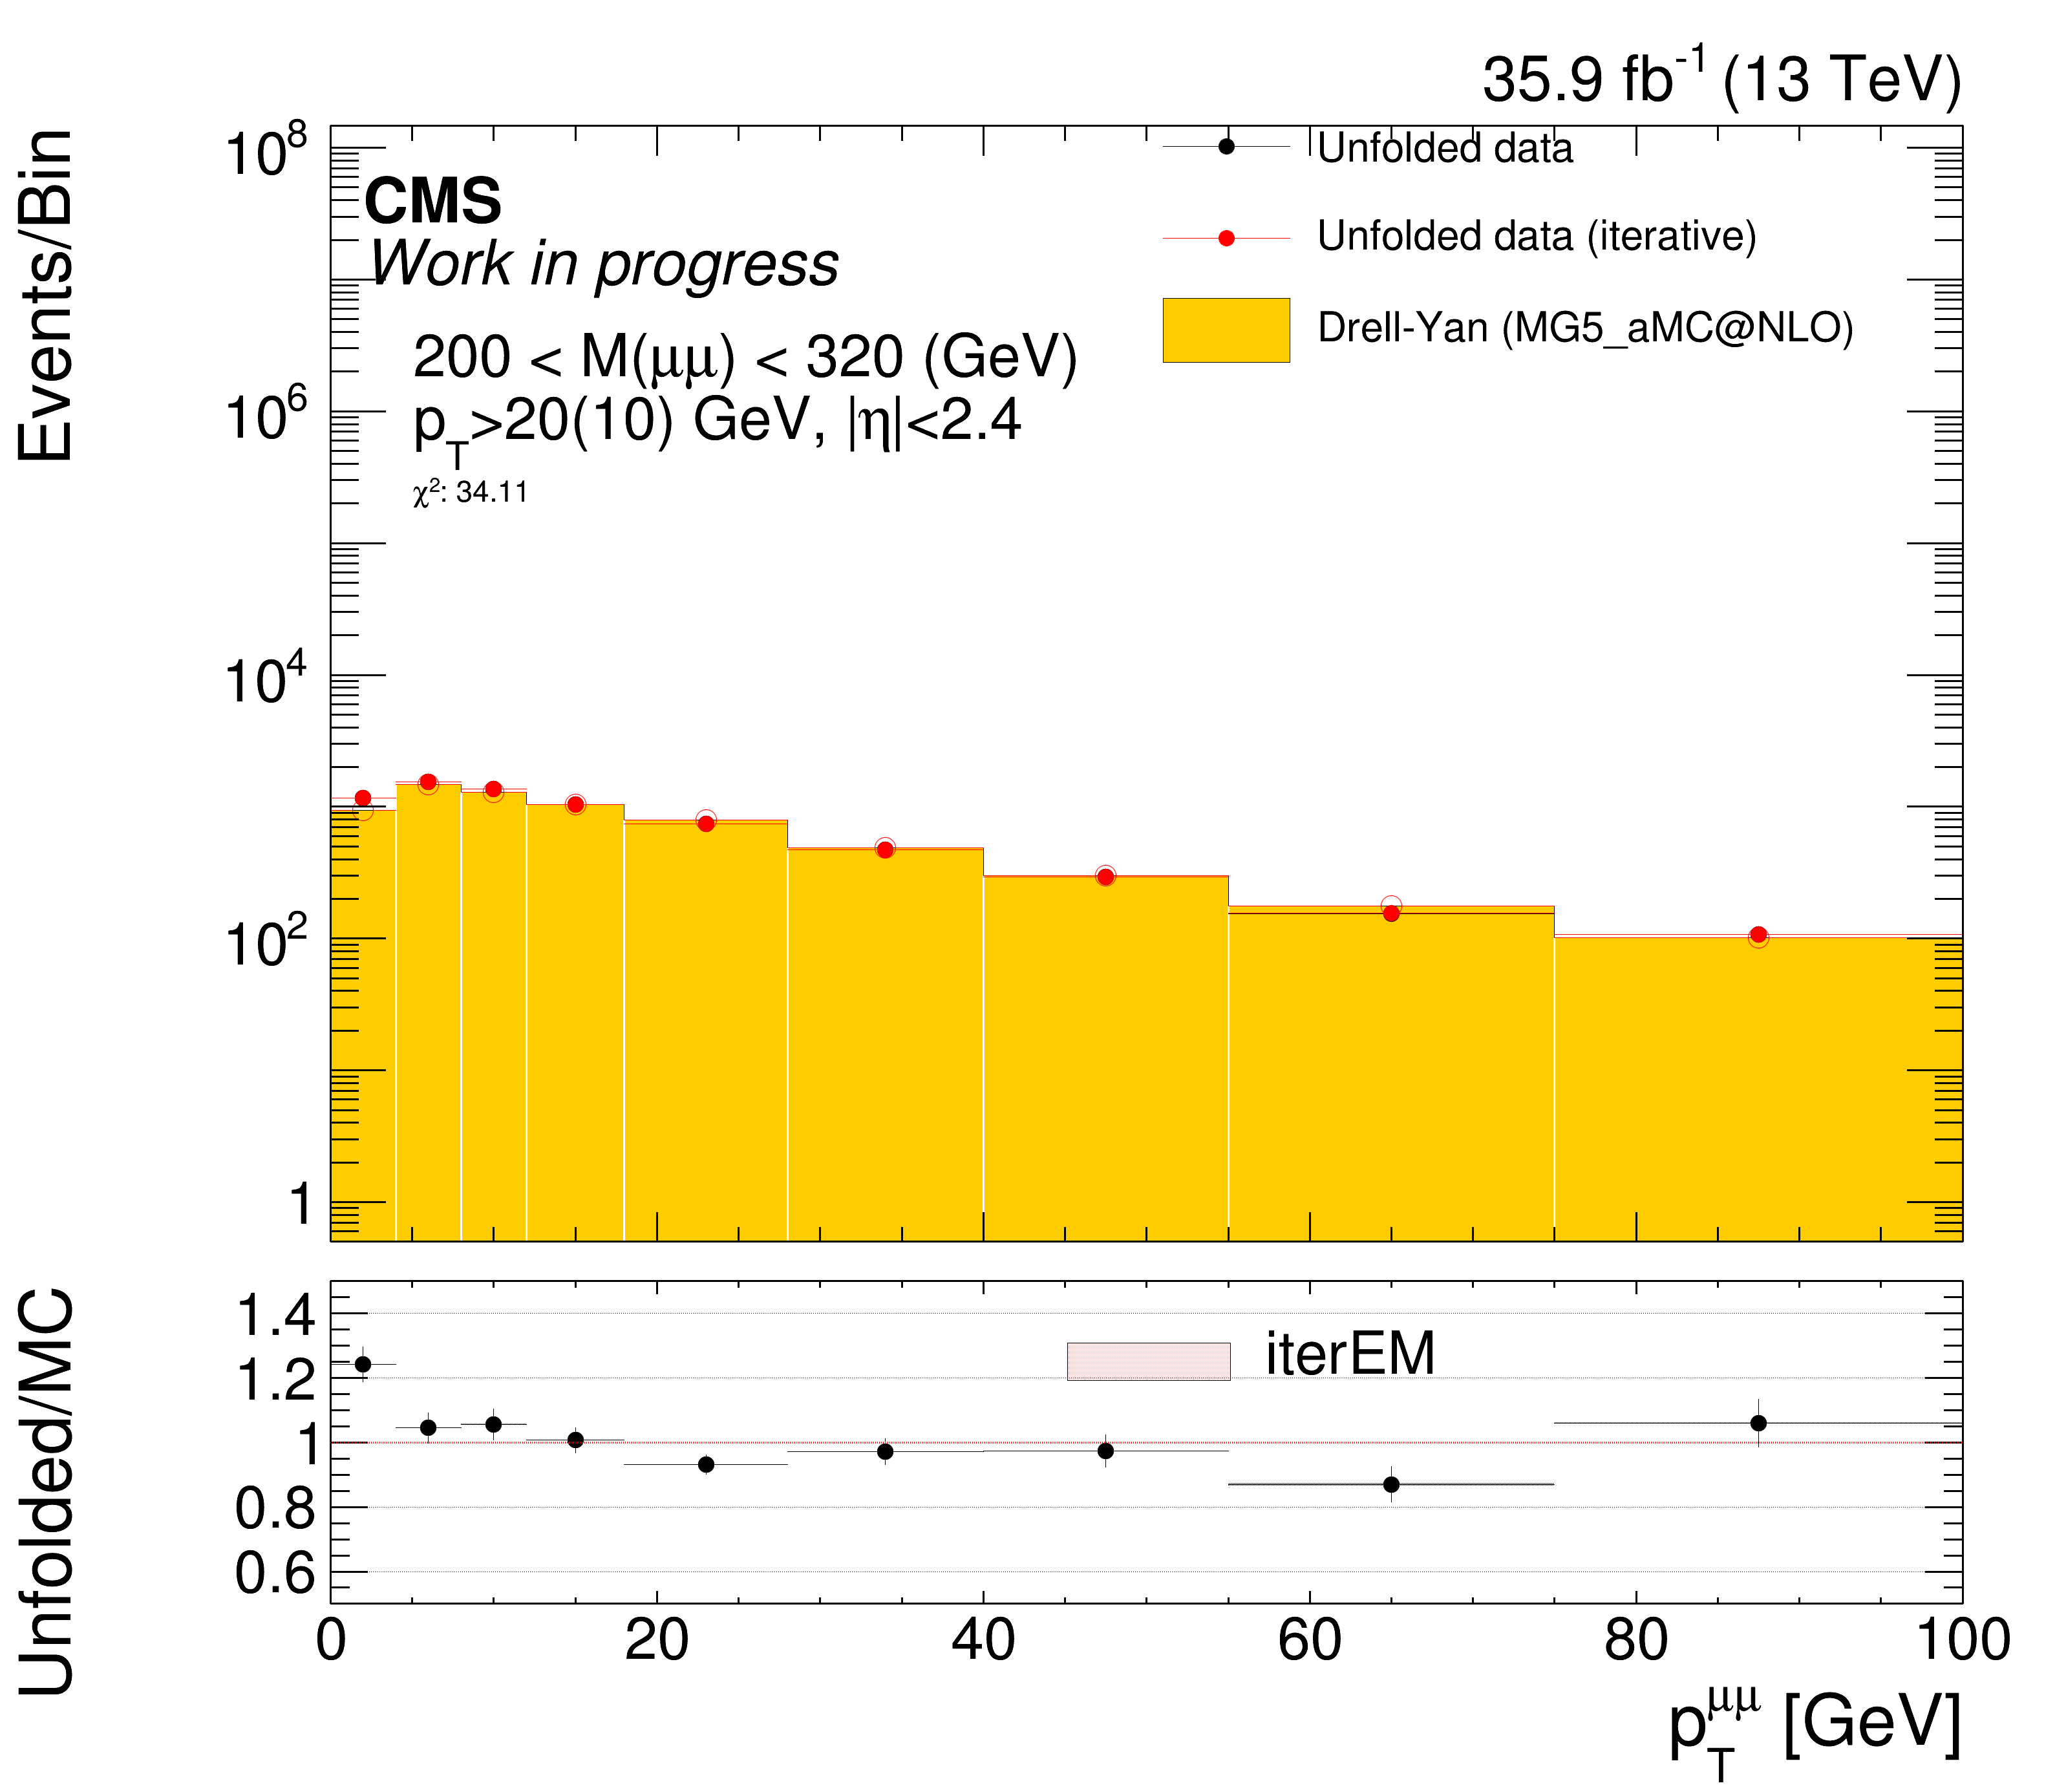

In [16]:
fsrUnfold_muon_2016_iter.drawUnfPlot("Mass", "mass[UO];pt[UOC0]", True, "iterEM", "FSRUnf_")

for massBin in range(5):
    fsrUnfold_muon_2016_iter.drawUnfPlot("Pt", "pt[UO];mass[UOC"+str(massBin)+"]", True, "iterEM", "FSRUnf_M"+str(massBin)+"_", massBin, True)

In [17]:
# Closure test
fsrUnfold_muon_2016_closure_1.setInputHist(True, False, None, "Acceptance", False, "nominal", "", True)
fsrUnfold_muon_2016_closure_1.subFake(False, "Nominal", "", True, "dressed_level_DY_fake") # Subract DY fake (out of fiducial volume at gen level)
fsrUnfold_muon_2016_closure_2.setInputHist(True, False, None, "Acceptance_evenEvent", False, "nominal", "", True)
fsrUnfold_muon_2016_closure_2.subFake(False, "Nominal", "", True, "dressed_level_DY_fake_evenEvent") # Subract DY fake (out of fiducial volume at gen level)

fsrUnfold_muon_2016_closure_3.setInputHist(True, False, None, "Acceptance", False, "nominal", "", True)
fsrUnfold_muon_2016_closure_3.subFake(False, "Nominal", "", True, "dressed_level_DY_fake") # Subract DY fake (out of fiducial volume at gen level)

fsrUnfold_muon_2016_closure_3.setSystematics("Closure", "Nominal", True)
fsrUnfold_muon_2016_closure_3.setInputHist(True, False, None, "Acceptance", True, "Closure", "Nominal", True)
fsrUnfold_muon_2016_closure_3.subFake(True, "Closure", "Nominal", True, "dressed_level_DY_fake") # Subract DY fake (out of fiducial volume at gen level)

In [18]:
fsrUnfold_muon_2016_closure_1.doUnfold()
fsrUnfold_muon_2016_closure_2.doUnfold()

In [19]:
fsrUnfold_muon_2016_closure_3.doUnfold()
fsrUnfold_muon_2016_closure_3.doUnfold(True,False)

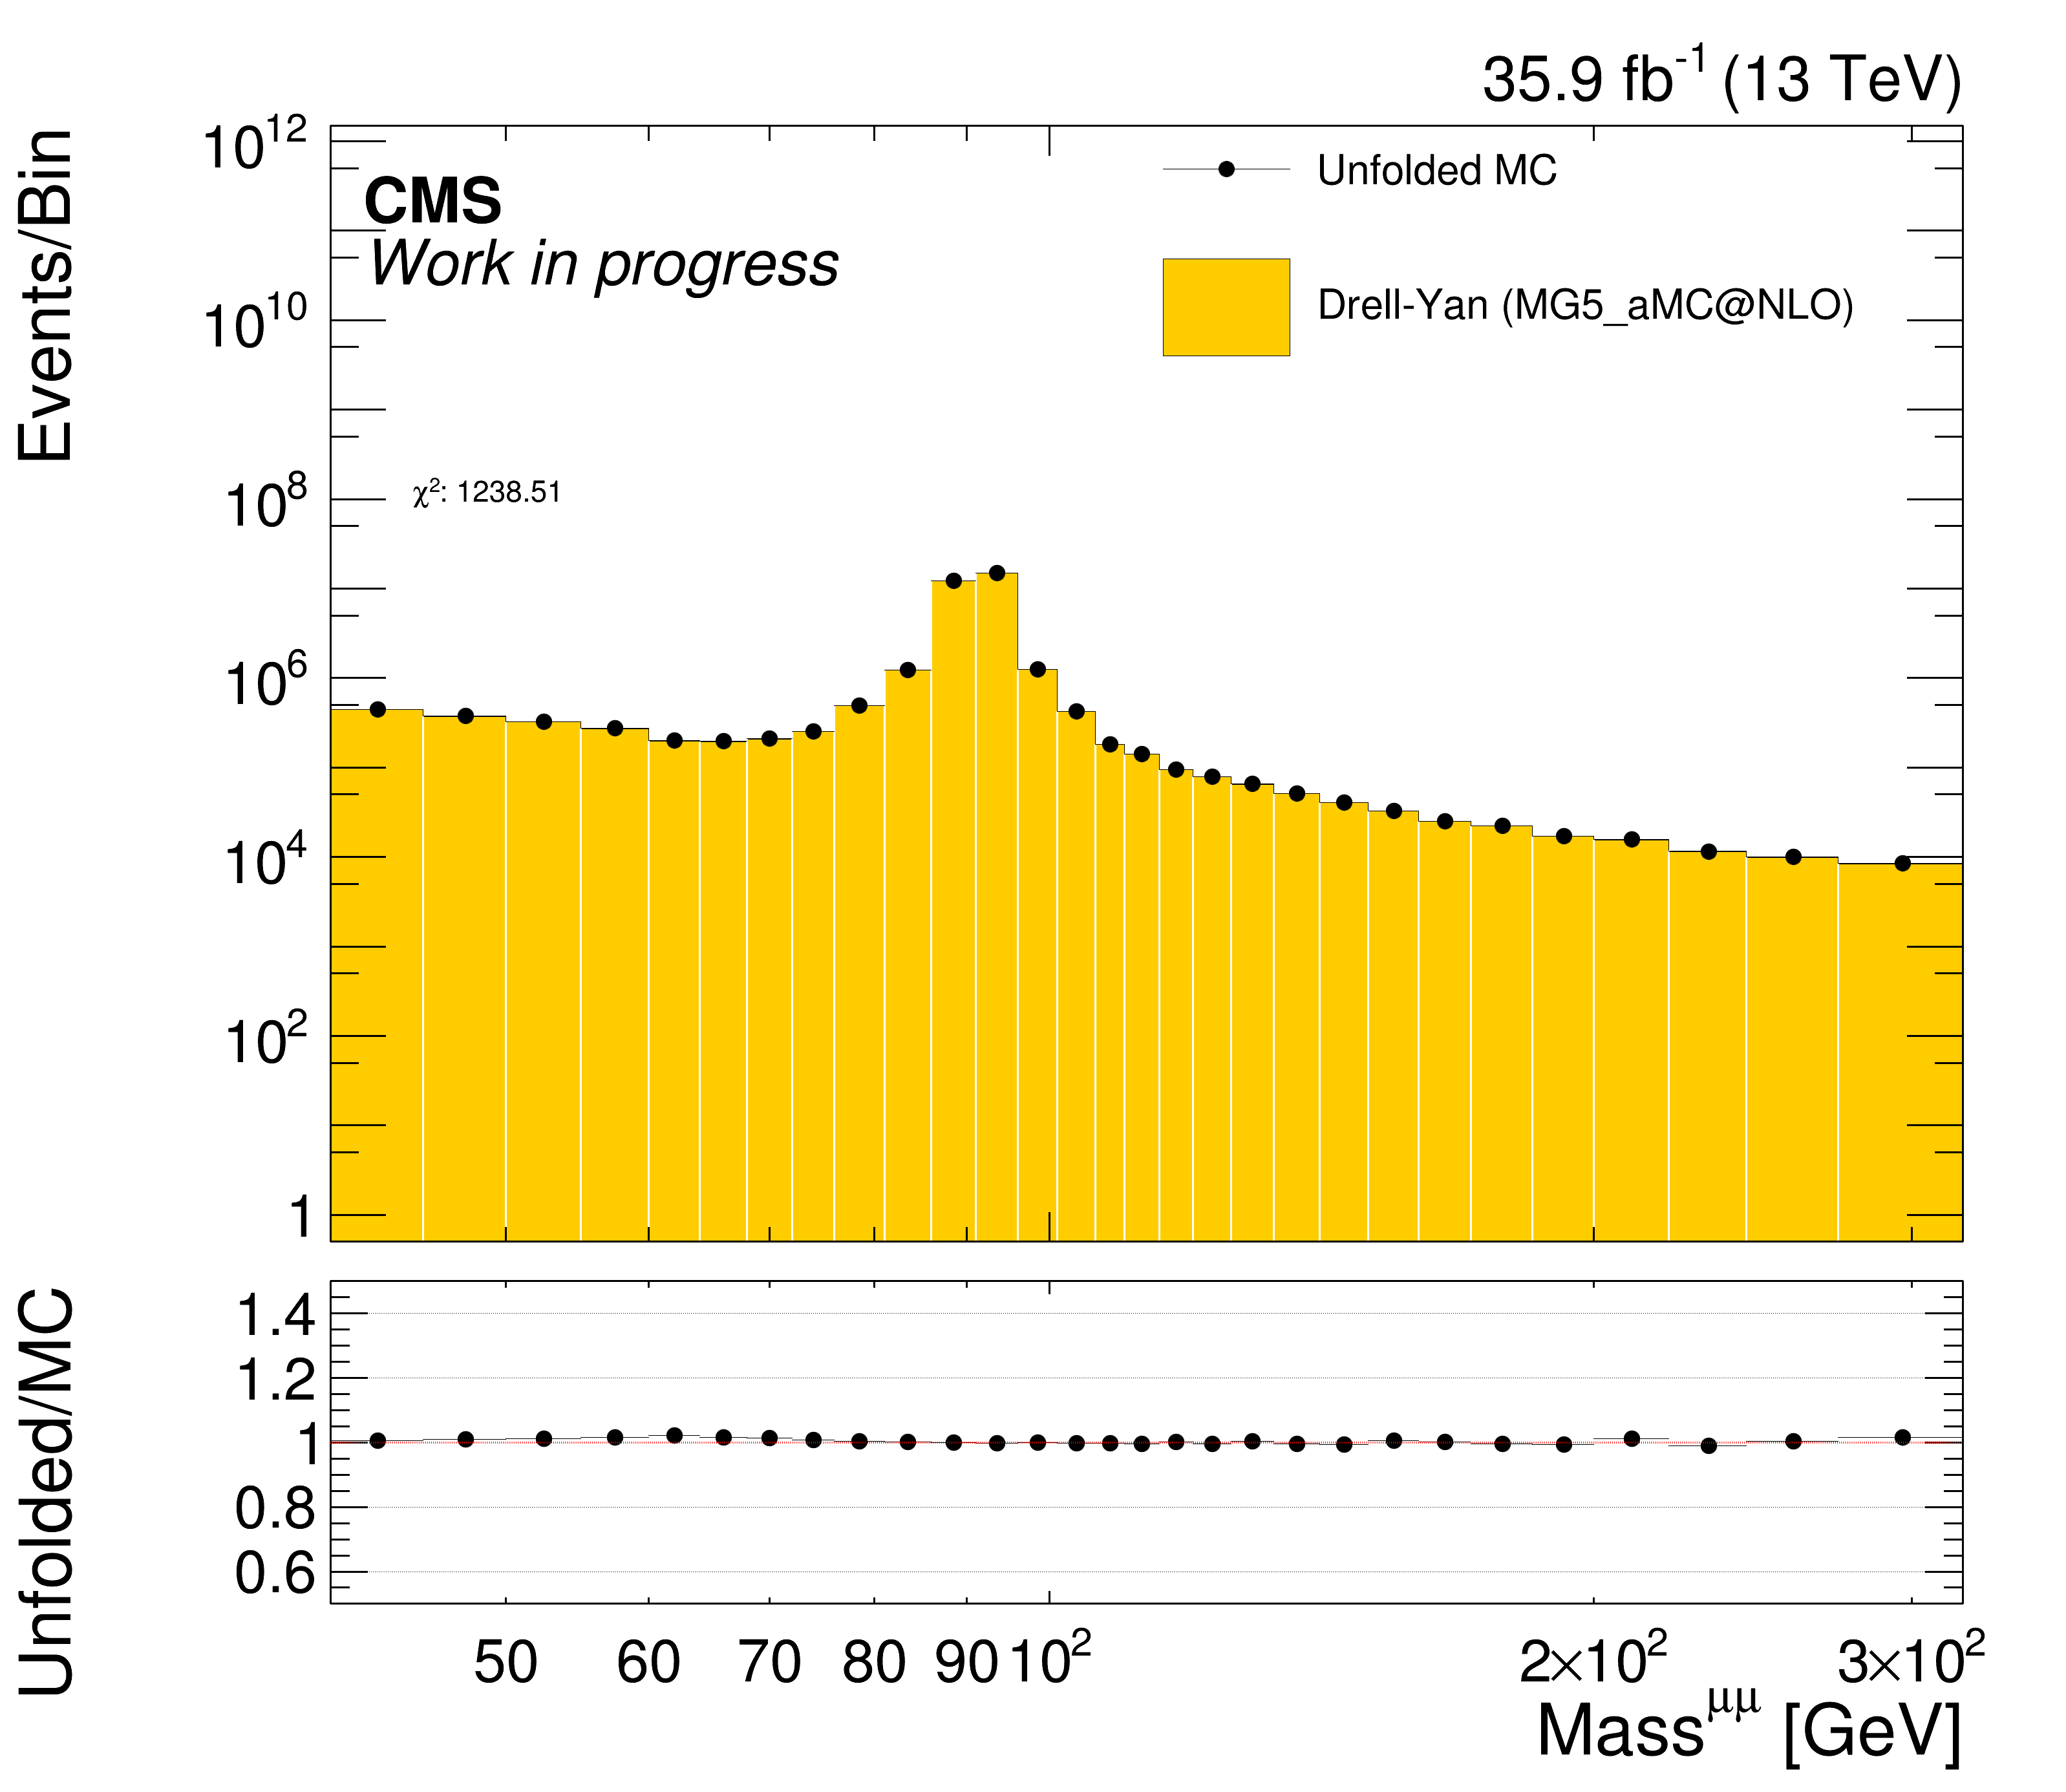

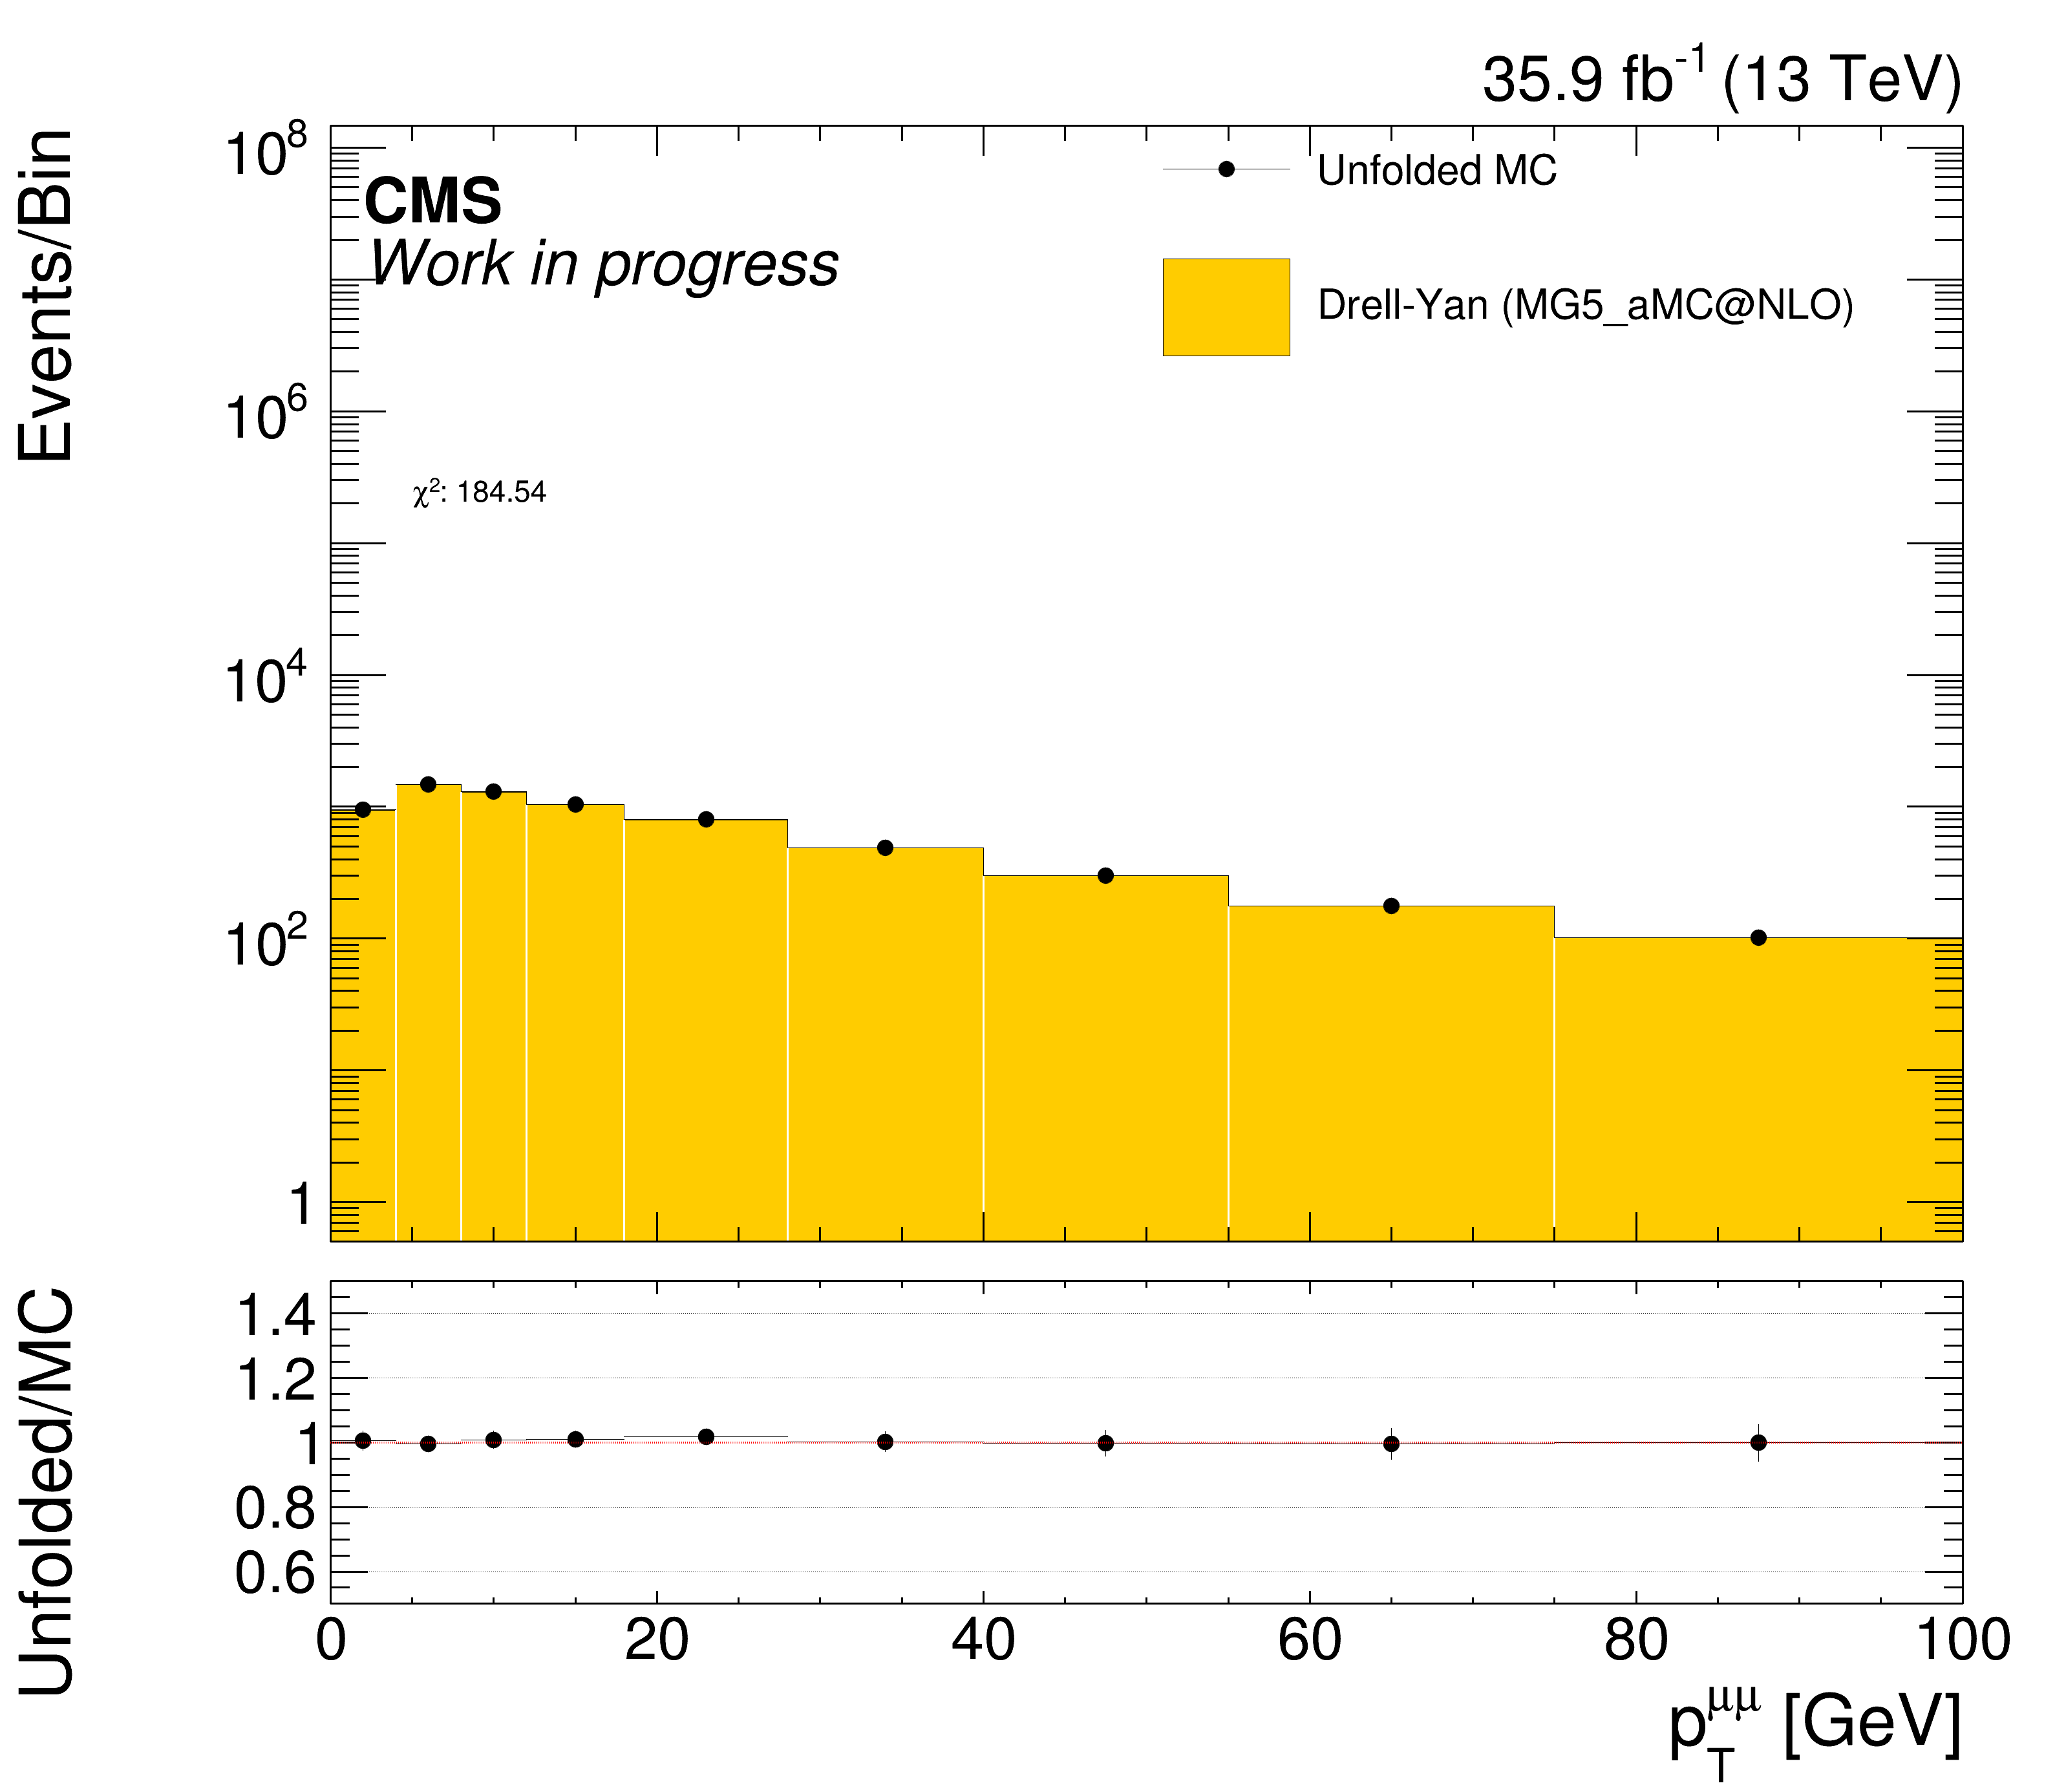

In [20]:
# Check unfolding closure
fsrUnfold_muon_2016_closure_3.drawUnfPlot("Mass", "mass[UO];pt[UOC0]", True, "", "FSRUnfClosure3_", 0, False, True)

for massBin in range(5):
    fsrUnfold_muon_2016_closure_3.drawUnfPlot("Pt", "pt[UO];mass[UOC"+str(massBin)+"]", True, "", "FSRUnfClosure3_M"+str(massBin)+"_", massBin, True, True)

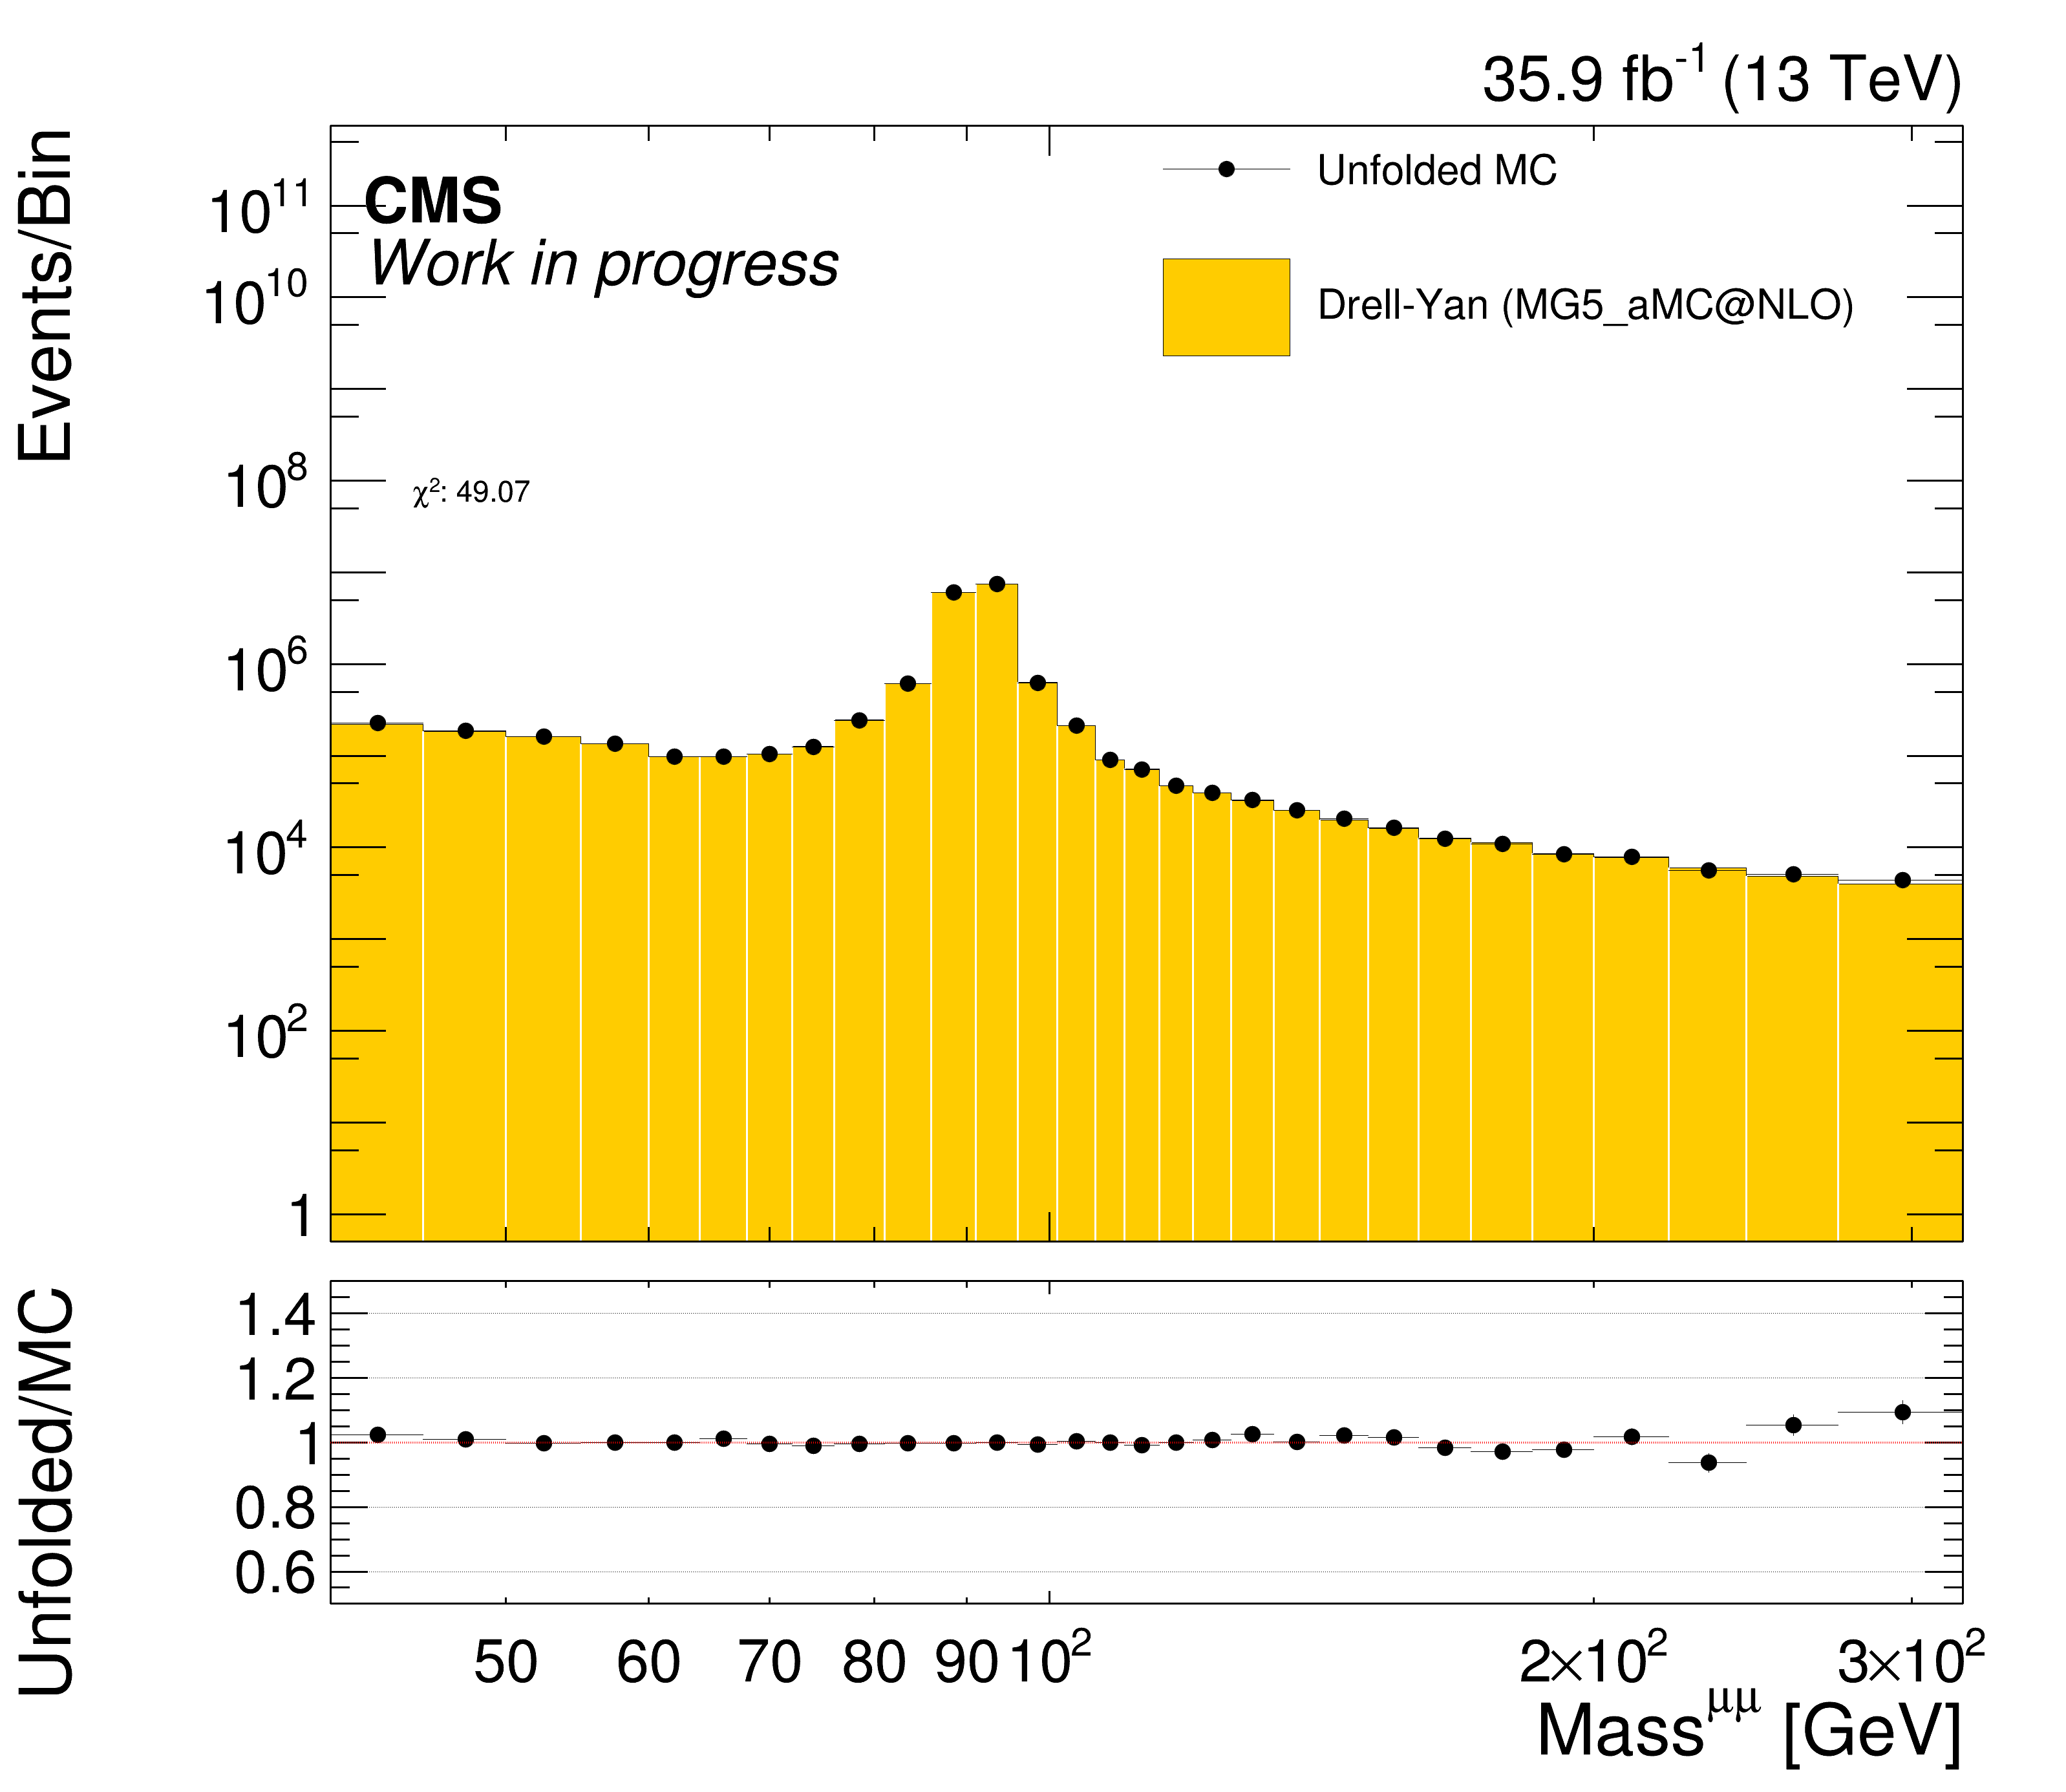

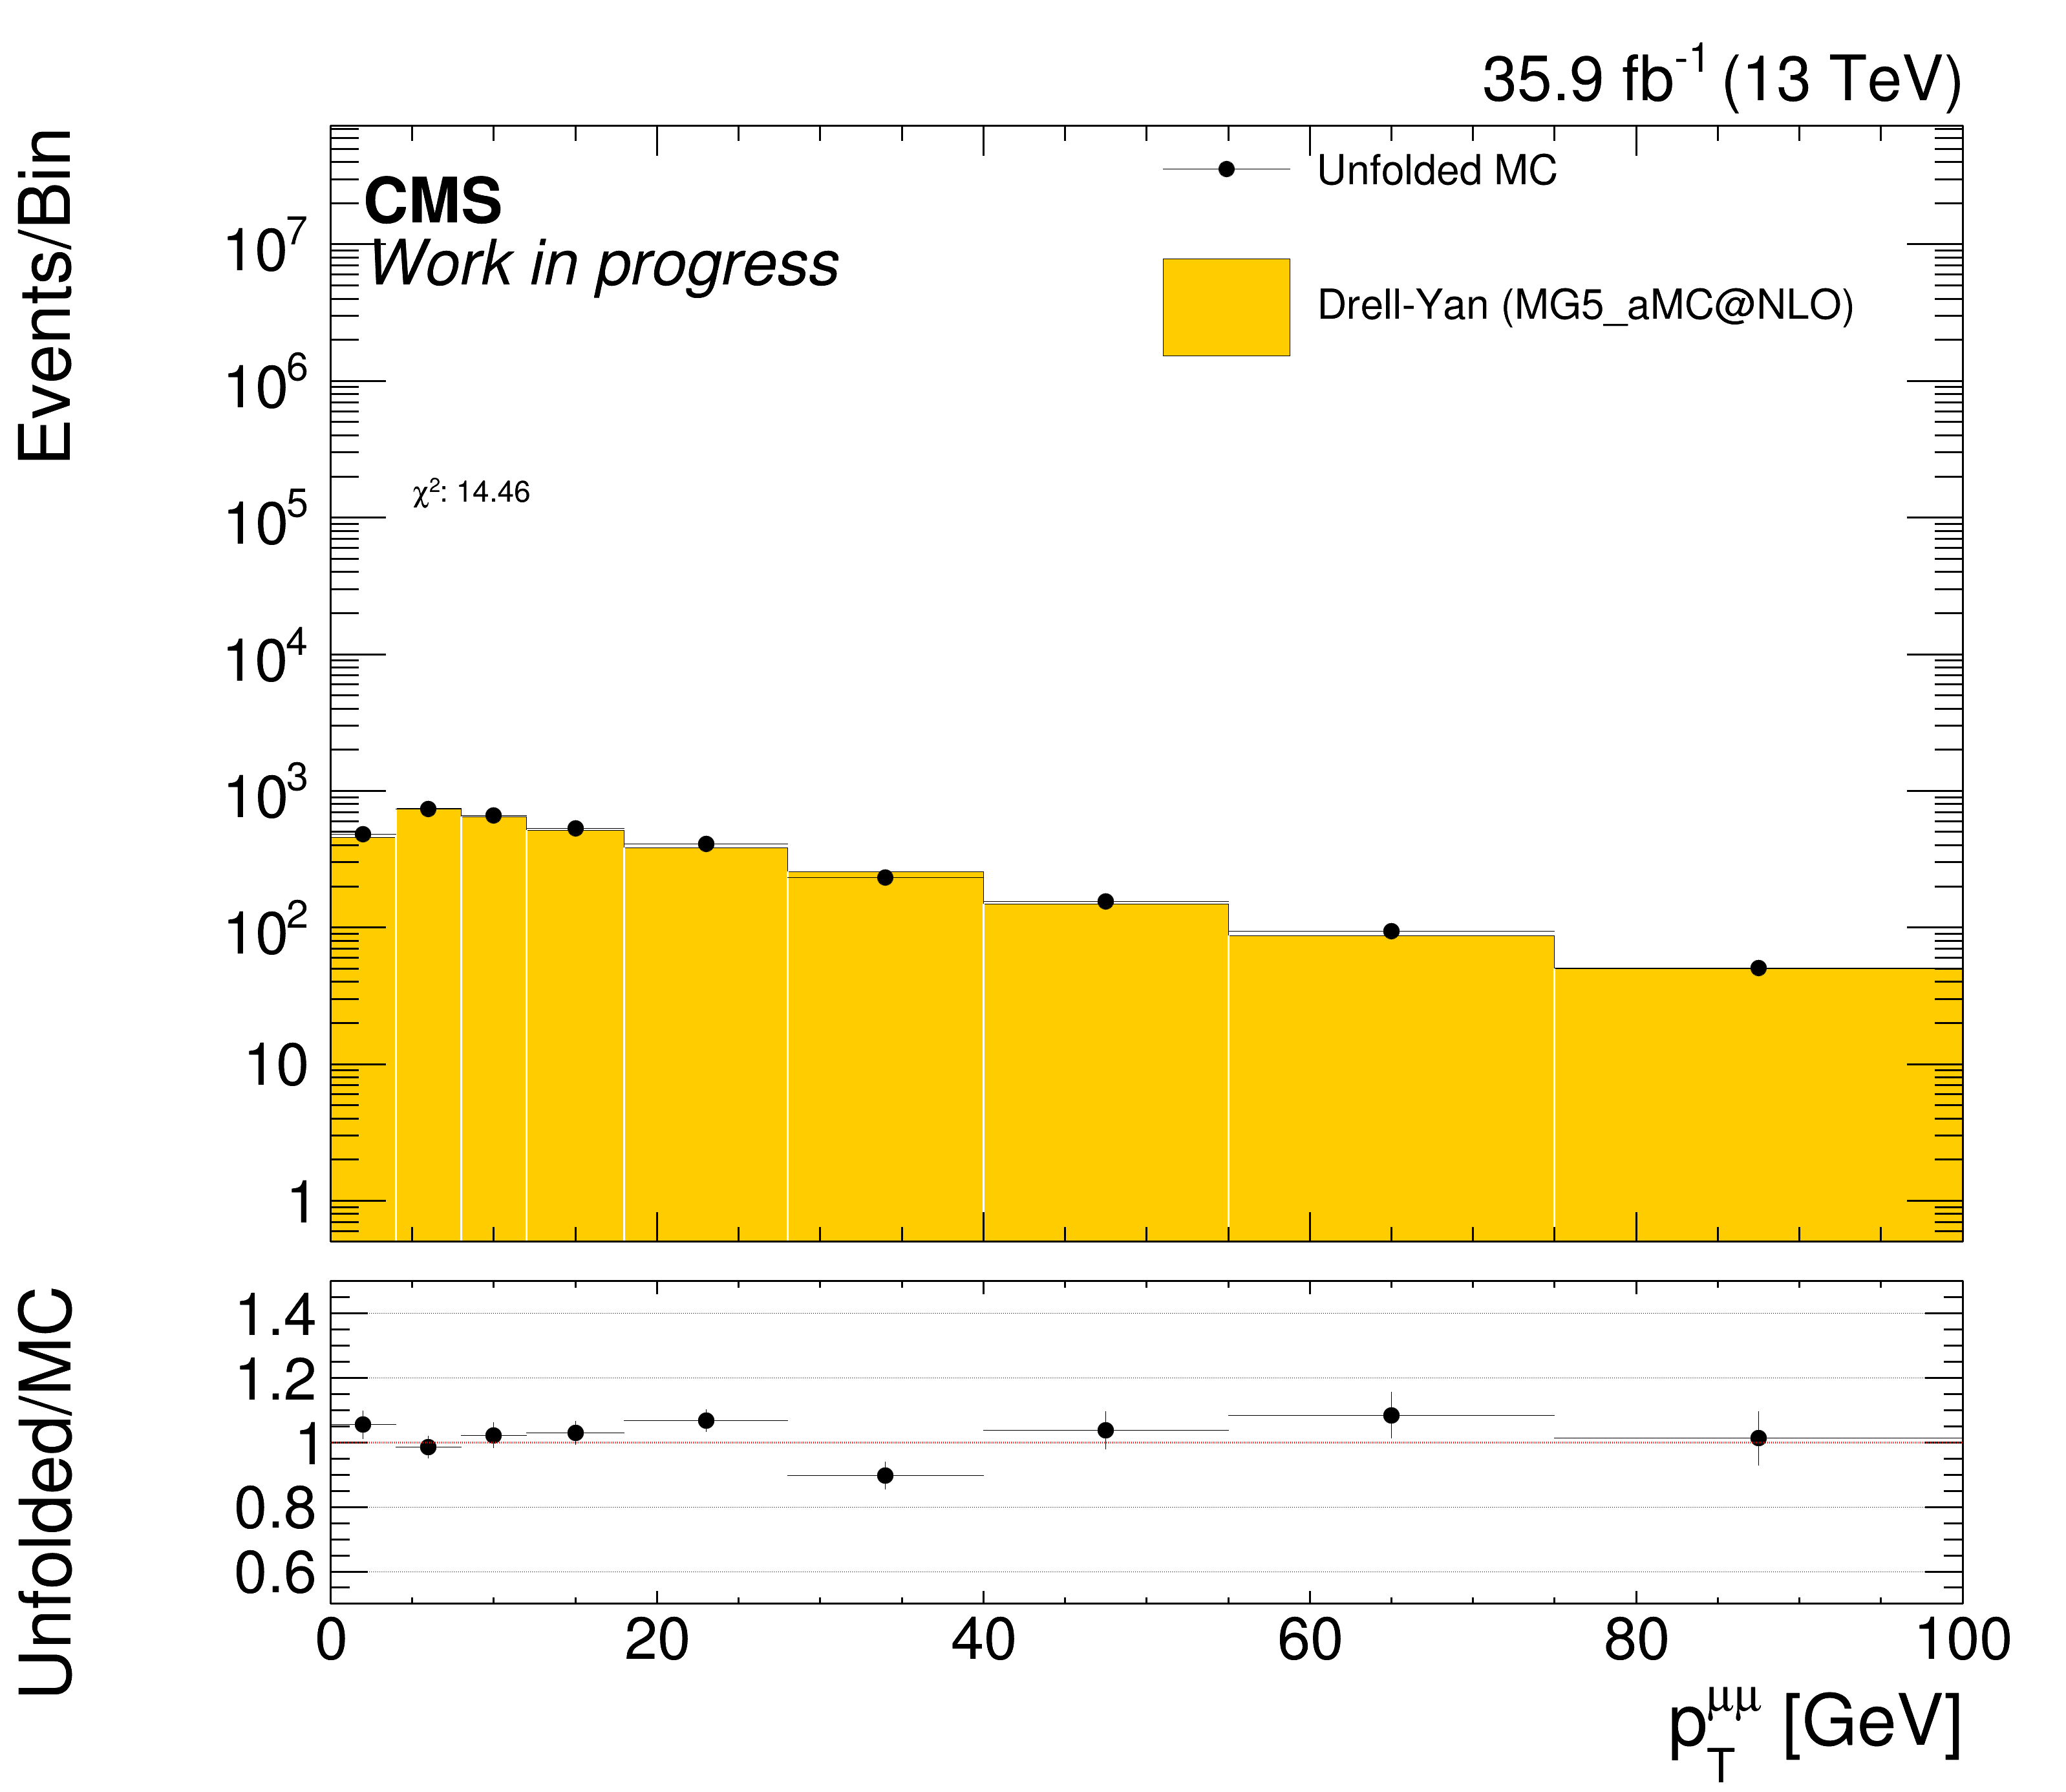

In [21]:
#Check unfolding closure
fsrUnfold_muon_2016_closure_1.drawUnfPlot("Mass", "mass[UO];pt[UOC0]", True, "", "FSRUnfClosure1_")
fsrUnfold_muon_2016_closure_2.drawUnfPlot("Mass", "mass[UO];pt[UOC0]", True, "", "FSRUnfClosure2_")

for massBin in range(5):
    fsrUnfold_muon_2016_closure_1.drawUnfPlot("Pt", "pt[UO];mass[UOC"+str(massBin)+"]", True, "", "FSRUnfClosure1_M"+str(massBin)+"_", massBin, True)
    fsrUnfold_muon_2016_closure_2.drawUnfPlot("Pt", "pt[UO];mass[UOC"+str(massBin)+"]", True, "", "FSRUnfClosure2_M"+str(massBin)+"_", massBin, True)